#Problem Statement:
A retail store that has multiple outlets across the country are facing issues in managing the inventory - to match the demand with respect to supply.


##Importing required libraries and loading the dataset

In [1]:
import numpy as np,pandas as pd,matplotlib.pyplot as plt,seaborn as sns,warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('Walmart DataSet.csv')
df.head()

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

##Performing EDA and if necessary applying transformations to data

In [3]:
df.shape

(6435, 8)

Checking for null values

In [4]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

Checking for duplicate values

In [5]:
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


As the 'Date' column in original dataset is of object datatype, it needs to be converted to datetime data type before proceeding with further EDA

In [7]:
df["Date"] = pd.to_datetime(df["Date"])
df['Year'] =df['Date'].dt.year
df['Month'] =df['Date'].dt.month
df['Week'] =df['Date'].dt.week

In [8]:
df.head()

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-05-02    1643690.90             0        42.31       2.572   
1      1 2010-12-02    1641957.44             1        38.51       2.548   
2      1 2010-02-19    1611968.17             0        39.93       2.514   
3      1 2010-02-26    1409727.59             0        46.63       2.561   
4      1 2010-05-03    1554806.68             0        46.50       2.625   

          CPI  Unemployment  Year  Month  Week  
0  211.096358         8.106  2010      5    17  
1  211.242170         8.106  2010     12    48  
2  211.289143         8.106  2010      2     7  
3  211.319643         8.106  2010      2     8  
4  211.350143         8.106  2010      5    18

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   Year          6435 non-null   int64         
 9   Month         6435 non-null   int64         
 10  Week          6435 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(5)
memory usage: 553.1 KB


##Objectives

###1. You are provided with the weekly sales data for their various outlets. Use statistical analysis, EDA, outlier analysis, and handle the missing values(if any) to come up with various insights that can give them a clear perspective on the following:
    
    a. If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?
    
    b. If the weekly sales show a seasonal trend, when and what could be the reason?

    c. Does temperature affect the weekly sales in any manner?
    
    d. How is the Consumer Price index affecting the weekly sales of various stores?
    
    e. Top performing stores according to the historical data.
    
    f. The worst performing store, and how significant is the difference between the highest and lowest performing stores.

Checking correlation between variables using a heatmap

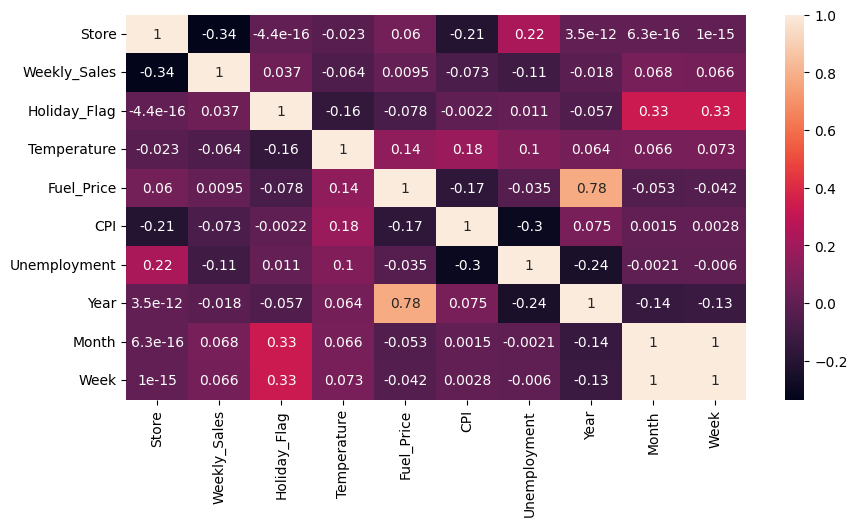

In [10]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

From above heatmap, it is clear that there is strong negative correlation between 'Store-Weekly_sales' and 'CPI-Unemployment'

Getting statistical information regarding the numeric columns

In [11]:
df.describe()

Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment         Year        Month         Week  
count  6435.000000   6435.000000  6435.000000  6435.000000  6435.000000  
mean    171.578394      7.999151  2010.965035     6.475524    26.000000  
std      39.356712      1.875885     0.797019     3.321797    14.511794  
min     126.064000      3.879000  2010.000000     1.000000     1.000000  
25%     131.735000      6.891000  2010.000000     4.000000    14.000000  
50%     182.616521      7.874000  2011.000000     6.000000    26.000000  
75%     212.743293      8.622000  2012.000000     9.000000    38.000000  
max     227.232807     14.313000  2012.000000    12.000000    52.000000

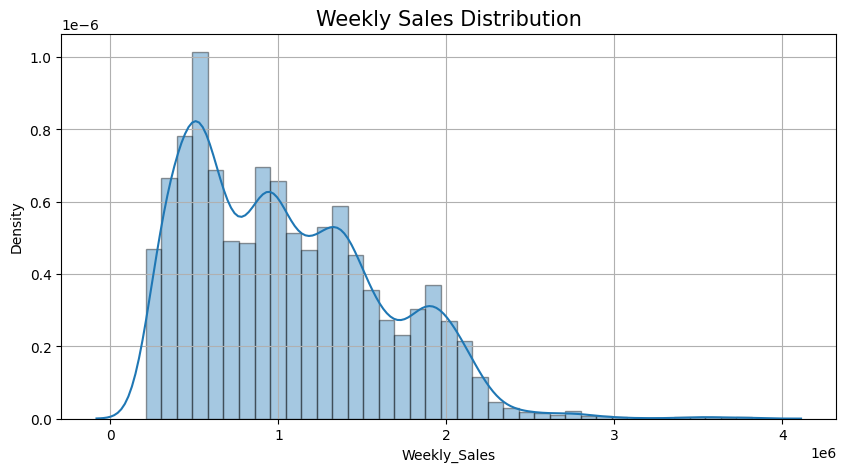

In [12]:
plt.figure(figsize = (10, 5))
sns.distplot(df['Weekly_Sales'], hist_kws=dict(edgecolor="black"))
plt.title('Weekly Sales Distribution', fontsize= 15)
plt.grid()
plt.show()

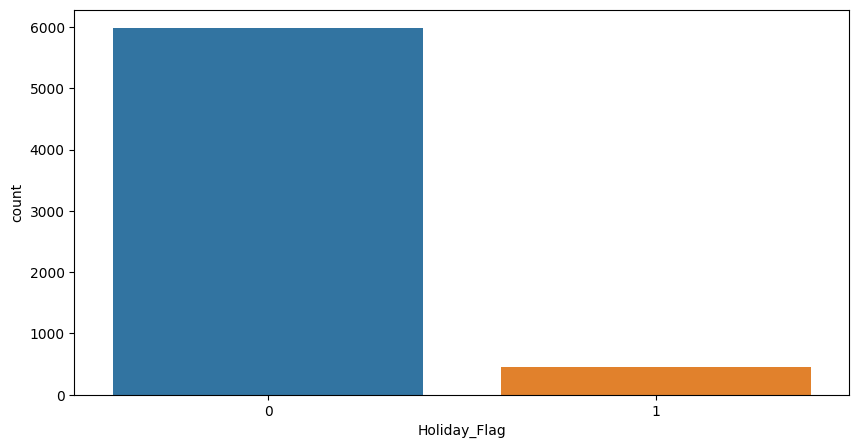

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'Holiday_Flag', data = df)
plt.show()

This indicates that majority sales take place on holidays

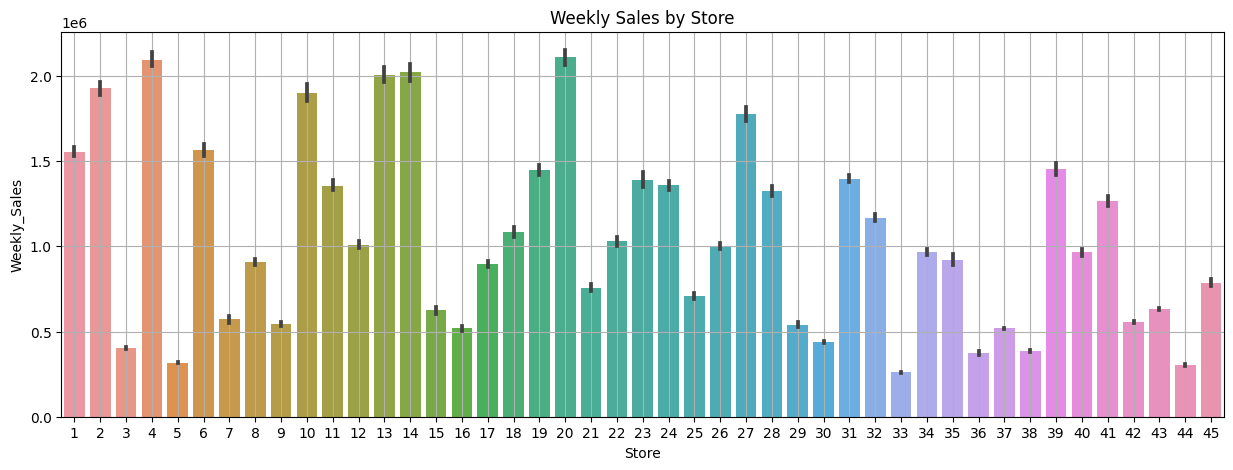

In [14]:
plt.figure(figsize=(15,5))
sns.barplot(x=df['Store'],y=df['Weekly_Sales'])
plt.title('Weekly Sales by Store')
plt.grid()
plt.show()

After looking at the plot it is visible that the store 20 has maximum Weekly Sales and store 33 has minimum sales

Visualizing relation between a categorized feature and the Weekly Sales to understand the year-wise trend of sales

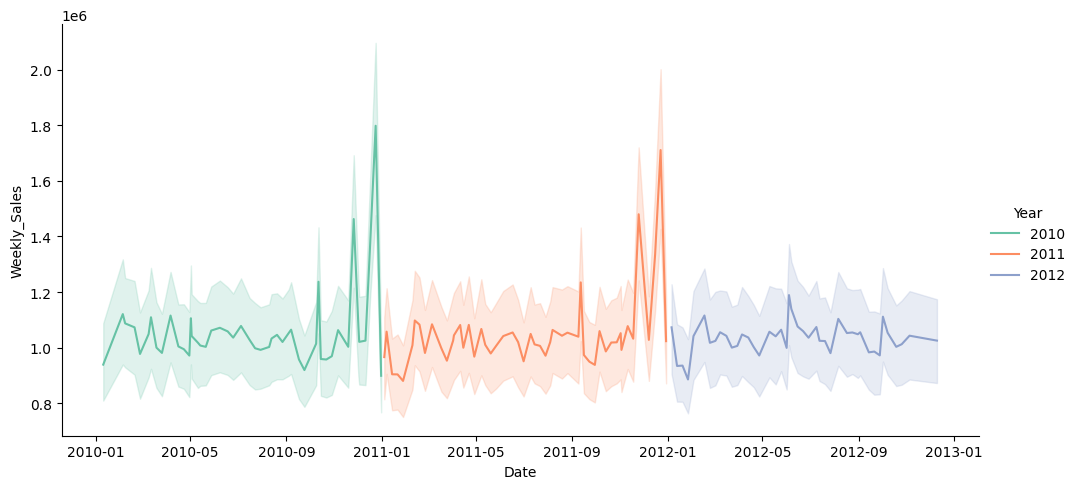

In [15]:
def graph_relation_to_weekly_sale(col_relation, df, x='Week', palette=None):
    cmap = sns.diverging_palette(220, 20, as_cmap=True)

    sns.relplot(
        x=x,
        y='Weekly_Sales',
        hue=col_relation,
        data=df,
        kind='line',
        height=5,
        aspect=2,
        palette=palette
    )
    plt.show()

graph_relation_to_weekly_sale('Year', df, x='Date', palette='Set2')

Spikes in sales during year end are commonly seen in 2010 and 2011. Similar such rise in sales can be expected towards end of 2012 and might continue over coming years

In [16]:
std_all = df.groupby('Store')['Weekly_Sales'].std()
print("Maximum Standard Deviation is for the Store No. {} ".format(std_all.idxmax()))
cv_all = ((df.groupby('Store')['Weekly_Sales'].std())/(df.groupby('Store')['Weekly_Sales'].mean()))*100
print("Maximum Coefficient of variation is for the Store No. {} ".format(cv_all.idxmax()))

Maximum Standard Deviation is for the Store No. 14 
Maximum Coefficient of variation is for the Store No. 35 


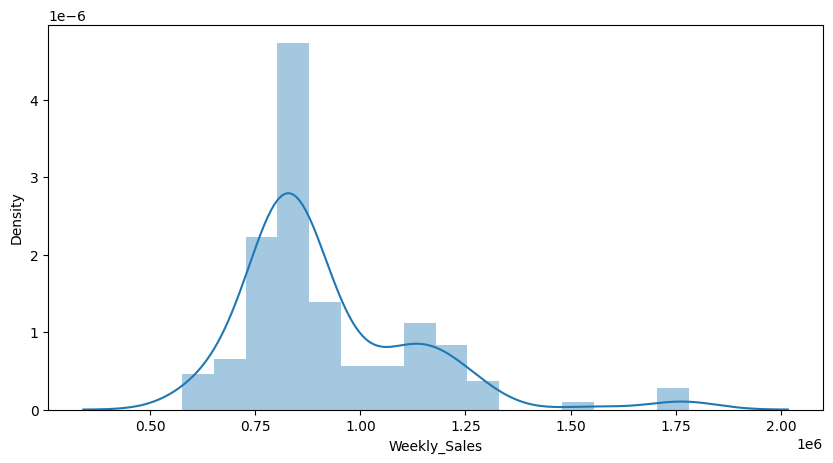

In [17]:
stores = df.groupby('Store')
store_35 = stores.get_group(35)
plt.figure(figsize=(10,5))
sns.distplot(store_35.Weekly_Sales)
plt.show()

In this distribution plot for store 35 it can be analyzed how the weekly sales are distributed, it is rightly skewed and are focused around 800000

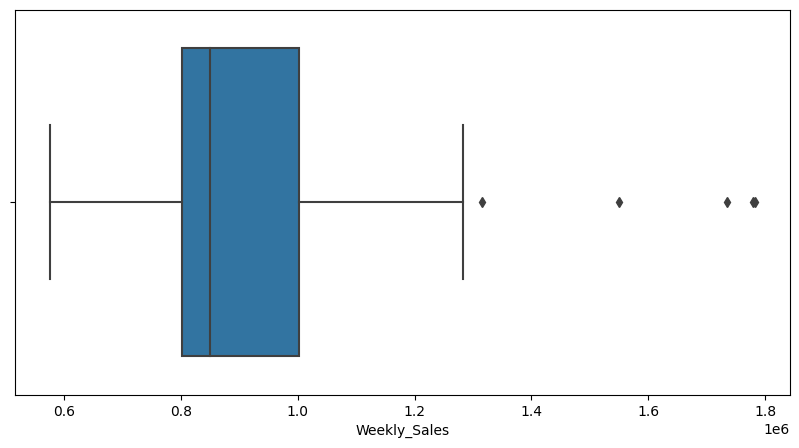

In [18]:
plt.figure(figsize=(10,5))
sns.boxplot(x=store_35['Weekly_Sales'])
plt.show()

This boxplot shows the weekly sales for store 35 has few outliers, also that it has highest coefficient of variation due to outliers as seen in the above boxplot and distribution curve

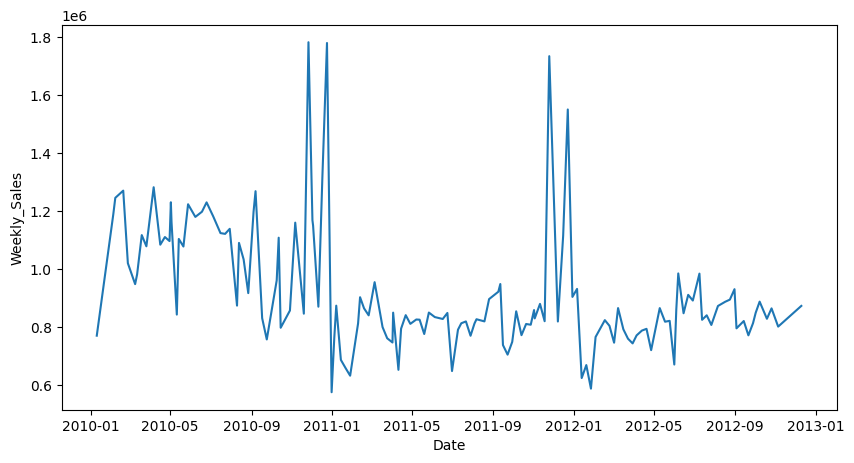

In [19]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Date', y = 'Weekly_Sales', data = store_35)
plt.show()

From above lineplot of Weekly Sales for store 35 it shows highly variability in sales during progressing weeks of a year. There is very irregular sale pattern for store 35. During the holidays particularly it is seeing high amount of sales. So it can be inferred that the store 35 will be seeing high demands in products due sudden rise in sales during holiday seasons and hence can stock up its inventory more than usual accordingly

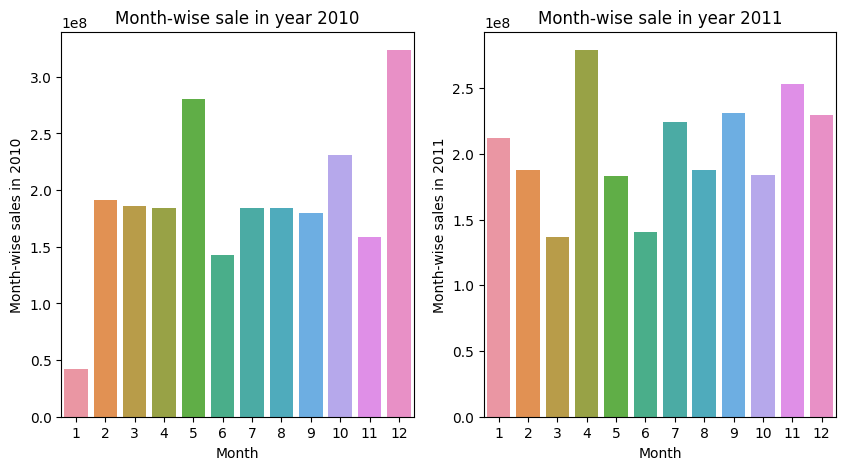

In [20]:
groups = df.groupby('Year')[['Month','Store', 'Weekly_Sales', 'Date']]
group2010 = groups.get_group(2010)
group2011 = groups.get_group(2011)

gr10 = group2010.groupby('Month')
gr11 = group2011.groupby('Month')

months = [1,2,3,4,5,6,7,8,9,10,11,12]
sale_monthWise2010 = []
sale_monthWise2011 = []

for i in months:
    val10 = gr10.get_group(i)['Weekly_Sales'].sum()
    sale_monthWise2010.append(val10)
    val11 = gr11.get_group(i)['Weekly_Sales'].sum()
    sale_monthWise2011.append(val11)

fig,axes=plt.subplots(1,2,figsize=(10,5))

plt.subplot(1,2,1)
# plt.figure(figsize=(10,5))
plt.xlabel("Month")
plt.ylabel("Month-wise sales in 2010")
plt.title('Month-wise sale in year 2010')
sns.barplot(x=months,y=sale_monthWise2010)

plt.subplot(1,2,2)
plt.xlabel("Month")
plt.ylabel("Month-wise sales in 2011")
plt.title('Month-wise sale in year 2011')
sns.barplot(x=months,y=sale_monthWise2011)

plt.show()

Above bar graphs give similarities between sales during months of 2010 and 2011. For both years, the sales went up compared to average during April, May and at the end of year from October onwards

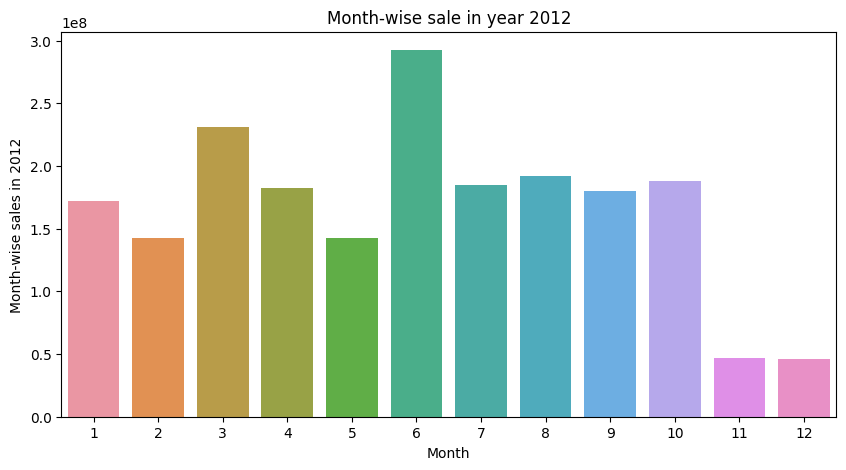

In [21]:
group2012 = groups.get_group(2012)
gr12 = group2012.groupby('Month')
sale_monthWise2012 = []

for i in months:
    val12 = gr12.get_group(i)['Weekly_Sales'].sum()
    sale_monthWise2012.append(val12)

plt.figure(figsize=(10,5))
plt.xlabel("Month")
plt.ylabel("Month-wise sales in 2012")
plt.title('Month-wise sale in year 2012')
sns.barplot(x=months,y=sale_monthWise2012)
plt.show()

Although sales for 2012 dropped significantly during year end maybe due to inefficient inventory management and it is evident from above bar graph. In order to bring their sales up again during their peak seasons, the stores need to improve their supply to meet demands and hence resulting in healthy sales

There are 45 different stores in this dataset and 6435 records. Sorting all records by their weekly sales amount and dividing the entire dataset into 5 group such that each group equally will contain 1287 records

In [22]:
group=df.sort_values(by='Weekly_Sales',ascending=False)
group['Group']=''
group.iloc[:1287,[11]]='A'
group.iloc[1287:2574,[11]]='B'
group.iloc[2574:3861,[11]]='C'
group.iloc[3861:5148,[11]]='D'
group.iloc[5148:,[11]]='E'

group.Group.value_counts()

A    1287
B    1287
C    1287
D    1287
E    1287
Name: Group, dtype: int64

In [23]:
group.head()

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
1905     14 2010-12-24    3818686.45             0        30.59       3.141   
2763     20 2010-12-24    3766687.43             0        25.17       3.141   
1333     10 2010-12-24    3749057.69             0        57.06       3.236   
527       4 2011-12-23    3676388.98             0        35.92       3.103   
1762     13 2010-12-24    3595903.20             0        34.90       2.846   

             CPI  Unemployment  Year  Month  Week Group  
1905  182.544590         8.724  2010     12    51     A  
2763  204.637673         7.484  2010     12    51     A  
1333  126.983581         9.003  2010     12    51     A  
527   129.984548         5.143  2011     12    51     A  
1762  126.983581         7.795  2010     12    51     A

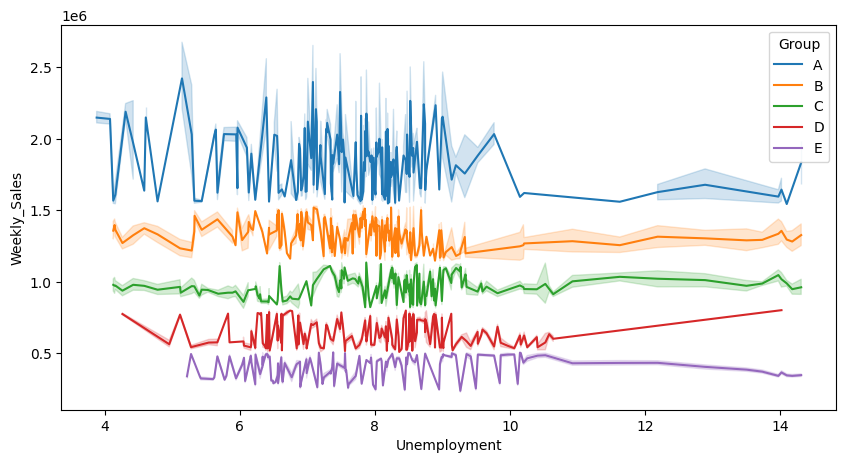

In [24]:
# a. Are the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?
plt.figure(figsize=(10,5))
sns.lineplot(x=group['Unemployment'], y = group['Weekly_Sales'],hue=group['Group'])
plt.show()

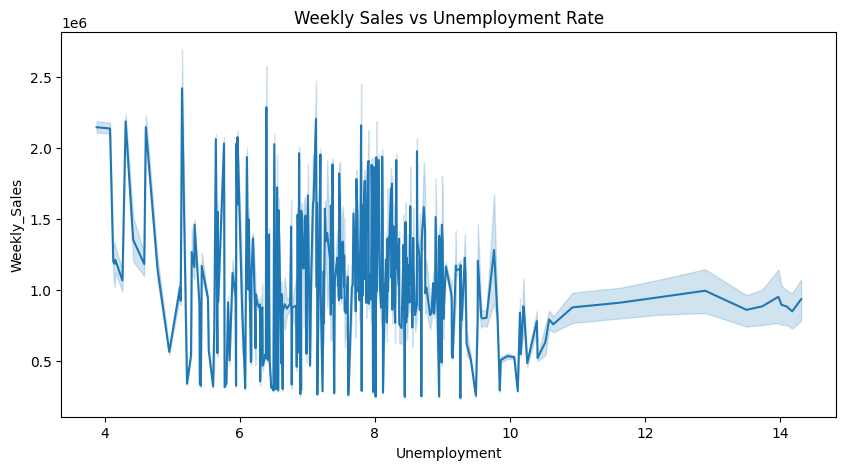

In [25]:
plt.figure(figsize=(10,5))
sns.lineplot(x=df['Unemployment'], y = df['Weekly_Sales'])
plt.title('Weekly Sales vs Unemployment Rate')
plt.savefig('WeeklySales_vs_UnemploymentRate.png')

From the heatmap it was evident that Weekly Sales are weakly correlated to Unemployment. Moreover from above graph, as the unemployment increases, there is decline in weekly sales as opposed to average unemployment rate (6-10) which contributes to notable weekly sales

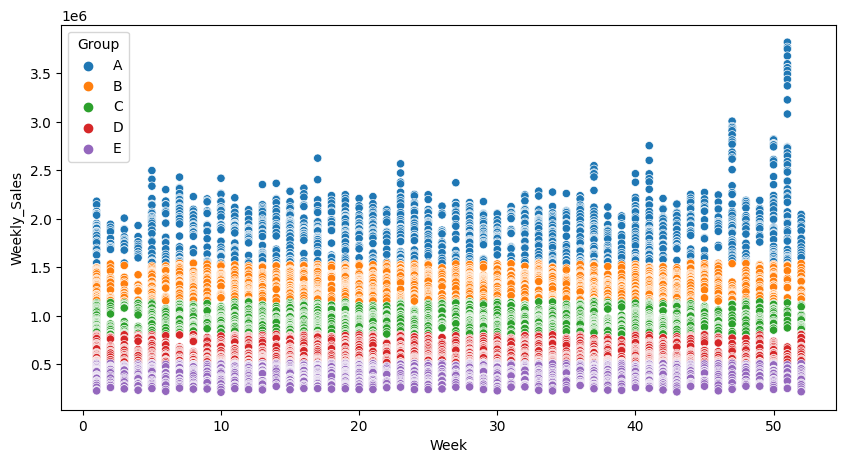

In [26]:
# b. If the weekly sales show a seasonal trend, when and what could be the reason?
plt.figure(figsize=(10,5))
sns.scatterplot(x=group['Week'],y=group['Weekly_Sales'],hue=group['Group'])
plt.show()

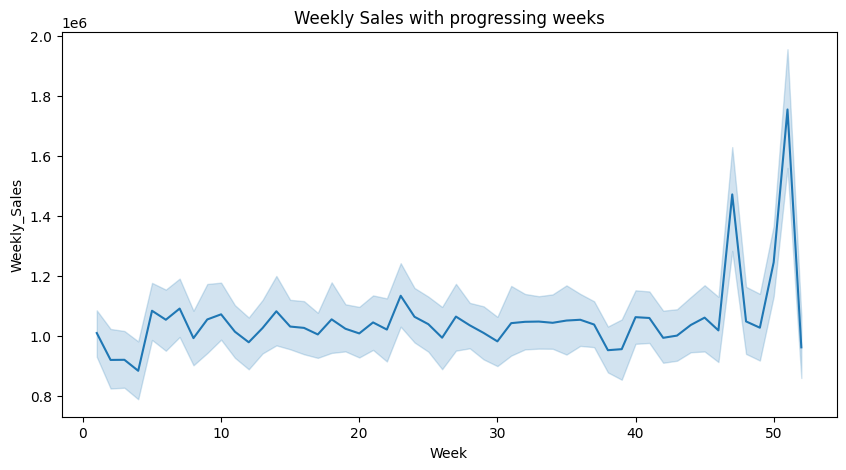

In [27]:
plt.figure(figsize=(10,5))
sns.lineplot(x=df['Week'],y=df['Weekly_Sales'])
plt.title('Weekly Sales with progressing weeks')
plt.savefig('WeeklySales_SeasonalTrend')

It can be understood that during seasons there is an expected surge in sales as there would be more requirement of goods at houses in general. Additionally usually there are seasonal promotional discounts offered by stores for holiday season. While for groups B to E (those having comparitively low sales than group A) there is not substantial change in sales even during seasons, but for group A there is slight rise in sales during first quarter and noticeable increase at year-end during last 6 weeks of year most likely due to Christmas season

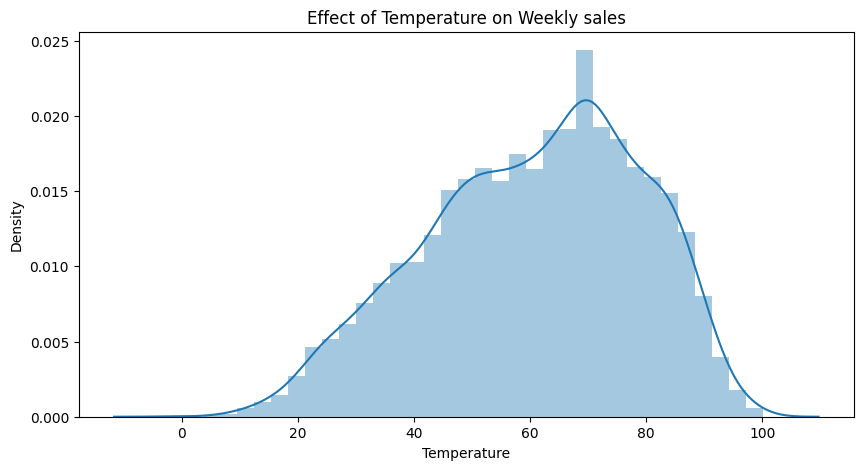

In [28]:
# c. Does temperature affect the weekly sales in any manner?
plt.figure(figsize=(10,5))
sns.distplot(group['Temperature'])
plt.title('Effect of Temperature on Weekly sales')
plt.savefig('WeeklySales_vs_Temperature.png')
plt.show()

It is widely known that weather has a profound effect on sales. While warmer weather promotes sales, cold/harsh or extremely hot weather is generally not a great encouragement for shoppers to get outdoors and spend money. Extreme temperatures can result in drop in number of incoming customers as it is a factor to affect commute to the store. Larger part of sales are concentrated between temperature range of 40 to 80. Additionally it can be inferred from above chart that as the temperature drops below normal limit or rises well over average, there is decline in sales

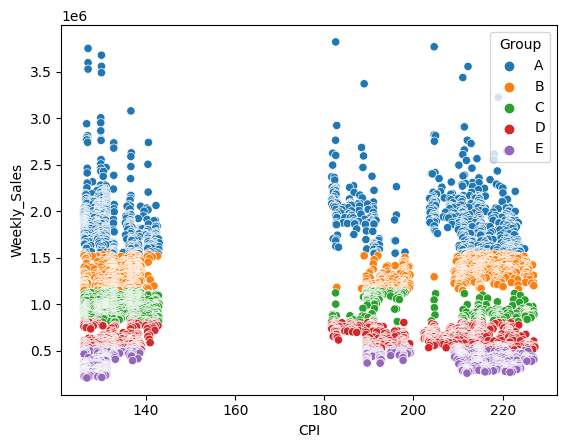

In [29]:
# d. How is the Consumer Price index affecting the weekly sales of various stores?
sns.scatterplot(x=group['CPI'],y=group['Weekly_Sales'],hue=group['Group'])
plt.show()

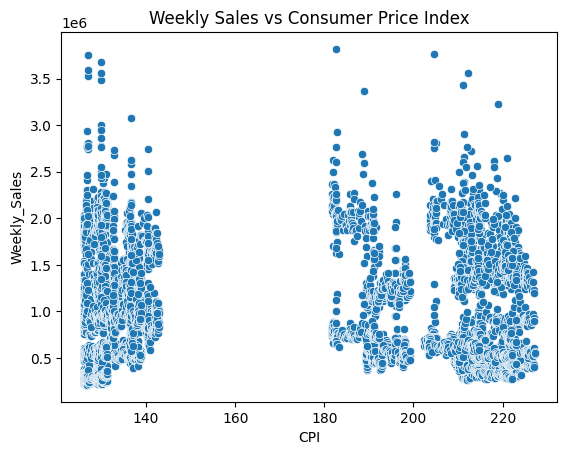

In [30]:
sns.scatterplot(x=df['CPI'],y=df['Weekly_Sales'])
plt.title('Weekly Sales vs Consumer Price Index')
plt.savefig('WeeklySales_vs_CPI.png')

A higher CPI generally means that the price of goods has increased and that an individual needs to spend more money to maintain the same standard of living. In scatter plot above, there are briefly three different clusters around different ranges of CPI. While there seems no visible relationship between the change in CPI and weekly sales for Walmart stores (sales still occur at high CPI rates), the only negligible observation that can be made is that very high amount of sales for store Type B and C when CPI is at a low rate of 140. Moreover moderate to average CPI (150 to 180) accounts for very low to no contribution for weekly sales.

In [31]:
# e. Top performing stores according to the historical data.
sell=group.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)
sell.head()

Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
Name: Weekly_Sales, dtype: float64

From the generated list showing store-wise sum of sales, when head is displayed in descending order it shows the top 5 best performing stores based on total weekly sales with Store 20 being the best performing store according to historical data

In [32]:
grp = group.groupby('Store').sum().reset_index()

In [33]:
def for_max(series, max_color = 'turquoise', other_color = 'lightgrey'):
    max_val = series.max()
    pal = []

    for item in series:
        if item == max_val:
            pal.append(max_color)
        else:
            pal.append(other_color)
    return pal

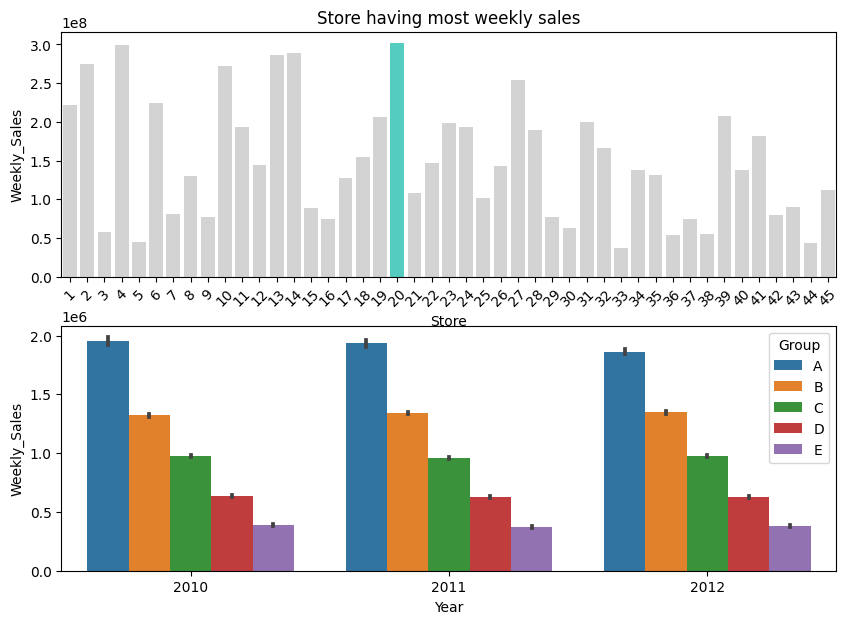

In [34]:
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(10,7))

plt.subplot(211)
ax = sns.barplot(x = 'Store', y = 'Weekly_Sales',
            data=grp,
            palette=for_max(grp['Weekly_Sales']))
plt.xticks(rotation=45)
plt.title('Store having most weekly sales')

plt.subplot(212)
sns.barplot(x=group['Year'],y=group['Weekly_Sales'],hue=group['Group'])

plt.savefig('WeeklySales_max.png')
plt.show()

It is visible that the top performing store among all others is store ID 20 (belongs to group A) having max sales, the sales of this particular store have surpassed sales of all other stores

In [35]:
# f. The worst performing store, and how significant is the difference between the highest and lowest performing stores.
sell.head()

Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
Name: Weekly_Sales, dtype: float64

From the generated list showing store-wise sum of sales, when head is displayed in ascending order it shows the top 5 worst performing stores based on total weekly sales with Store 33 being the worst performing store according to historical data

In [36]:
def for_min(series, min_color = 'teal', other_color = 'lightgrey'):
    min_val = series.min()
    pal = []

    for item in series:
        if item == min_val:
            pal.append(min_color)
        else:
            pal.append(other_color)
    return pal

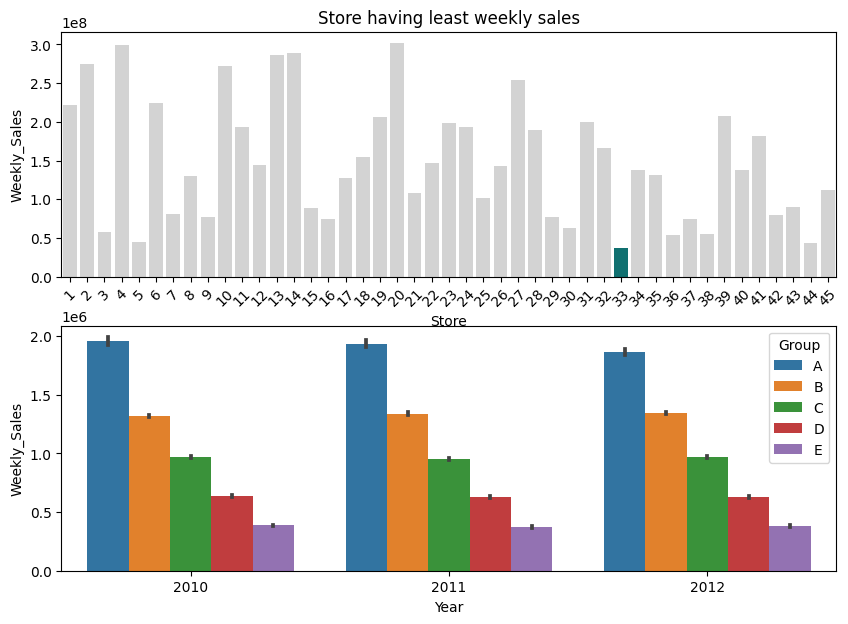

In [37]:
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(10,7))

plt.subplot(211)
ax = sns.barplot(x = 'Store', y = 'Weekly_Sales',
            data=grp,
            palette=for_min(grp['Weekly_Sales']))
plt.xticks(rotation=45)
plt.title('Store having least weekly sales')

plt.subplot(212)
sns.barplot(x=group['Year'],y=group['Weekly_Sales'],hue=group['Group'])

plt.savefig('WeeklySales_min.png')
plt.show()

In [38]:
diff=grp['Weekly_Sales'].max()-grp['Weekly_Sales'].min()
print('The difference between to top and least performing store in terms of weekly sales is:',diff)

The difference between to top and least performing store in terms of weekly sales is: 264237570.49999997


This is confirmed even from above graph that store 33 (part of group E) generated very less revenue. This store has the least amount of sales compared to other stores

###Machine learning algorithms

Machine learning algorithms are directly applied here without performing any label encoding or feature scaling. This definitely affects the accuracy of the models but roughly gives the idea on more or less how they will perform for given dataset

In [39]:
from scipy import stats

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [40]:
x = group.drop(['Date','Weekly_Sales','Group'],axis=1)
y = group.Weekly_Sales

In [41]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20, random_state=50)

####Linear reg


In [42]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [43]:
lr_acc = lr.score(x_test,y_test)*100
print("Linear Regressor Accuracy:",lr_acc)

Linear Regressor Accuracy: 14.603844965649138


In [44]:
y_pred = lr.predict(x_test)

In [45]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

MAE 426773.70102661446
MSE 275266332670.53955
RMSE 524658.3008688032
R2 0.14617806603021222


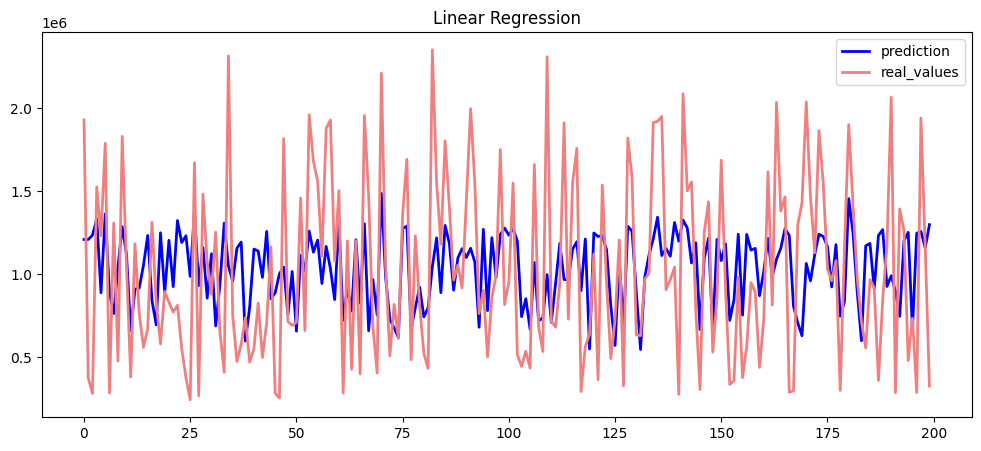

In [46]:
plt.figure(figsize=(12,5))
plt.plot(lr.predict(x_test[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.title('Linear Regression')
plt.savefig('LinearRegression.png')
plt.legend(loc="best")
plt.show()

As observed, Linear Regression model does not fit well at all for this dataset

####Random Forest

In [47]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

RandomForestRegressor()

In [48]:
rf_acc = rf.score(x_test,y_test)*100
print("Random Forest Regressor Accuracy - ",rf_acc)

Random Forest Regressor Accuracy -  95.48838744325758


In [49]:
y_pred = rf.predict(x_test)

In [50]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

MAE 67850.44536596737
MSE 14542751279.905807
RMSE 120593.33016342905
R2 0.9548844864645941


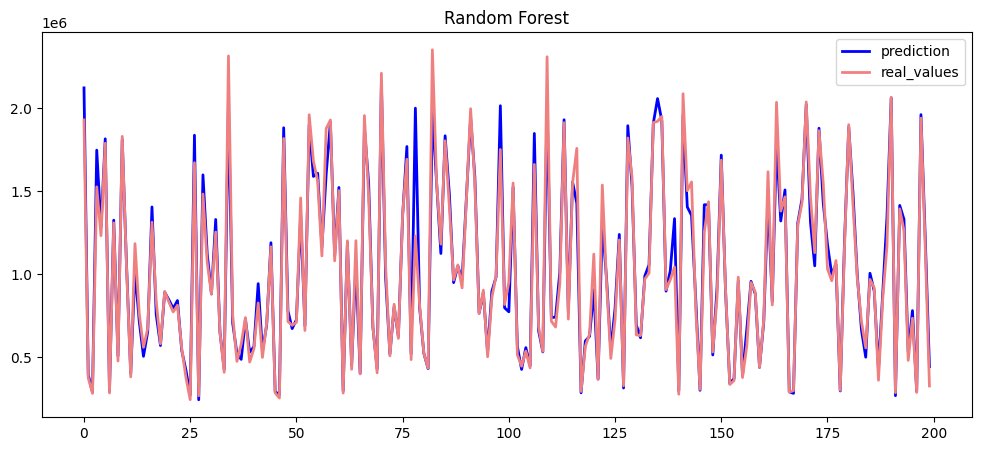

In [51]:
plt.figure(figsize=(12,5))
plt.plot(rf.predict(x_test[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.title('Random Forest')
plt.savefig('RandomForest.png')
plt.legend(loc="best")
plt.show()

Random Forest is works very well here, has better accuracy and is suited for this dataset opposed to linear regression

###2. Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks.

####Data preparation by store-wise grouping

In [52]:
grp1=group[group['Store']==1]
grp2=group[group['Store']==2]
grp3=group[group['Store']==3]
grp4=group[group['Store']==4]
grp5=group[group['Store']==5]
grp6=group[group['Store']==6]

d1=grp1[['Date','Weekly_Sales']]
d2=grp2[['Date','Weekly_Sales']]
d3=grp3[['Date','Weekly_Sales']]
d4=grp4[['Date','Weekly_Sales']]
d5=grp5[['Date','Weekly_Sales']]
d6=grp6[['Date','Weekly_Sales']]
data=[d1,d2,d3,d4,d5,d6]

In [53]:
for i in data:
    i.set_index('Date',inplace=True)

In [54]:
s1=pd.DataFrame(d1['Weekly_Sales'].groupby(d1.index).sum())
s2=pd.DataFrame(d2['Weekly_Sales'].groupby(d2.index).sum())
s3=pd.DataFrame(d3['Weekly_Sales'].groupby(d3.index).sum())
s4=pd.DataFrame(d4['Weekly_Sales'].groupby(d4.index).sum())
s5=pd.DataFrame(d5['Weekly_Sales'].groupby(d5.index).sum())
s6=pd.DataFrame(d6['Weekly_Sales'].groupby(d6.index).sum())

####Visualizing weekly sales and comparing them for each store

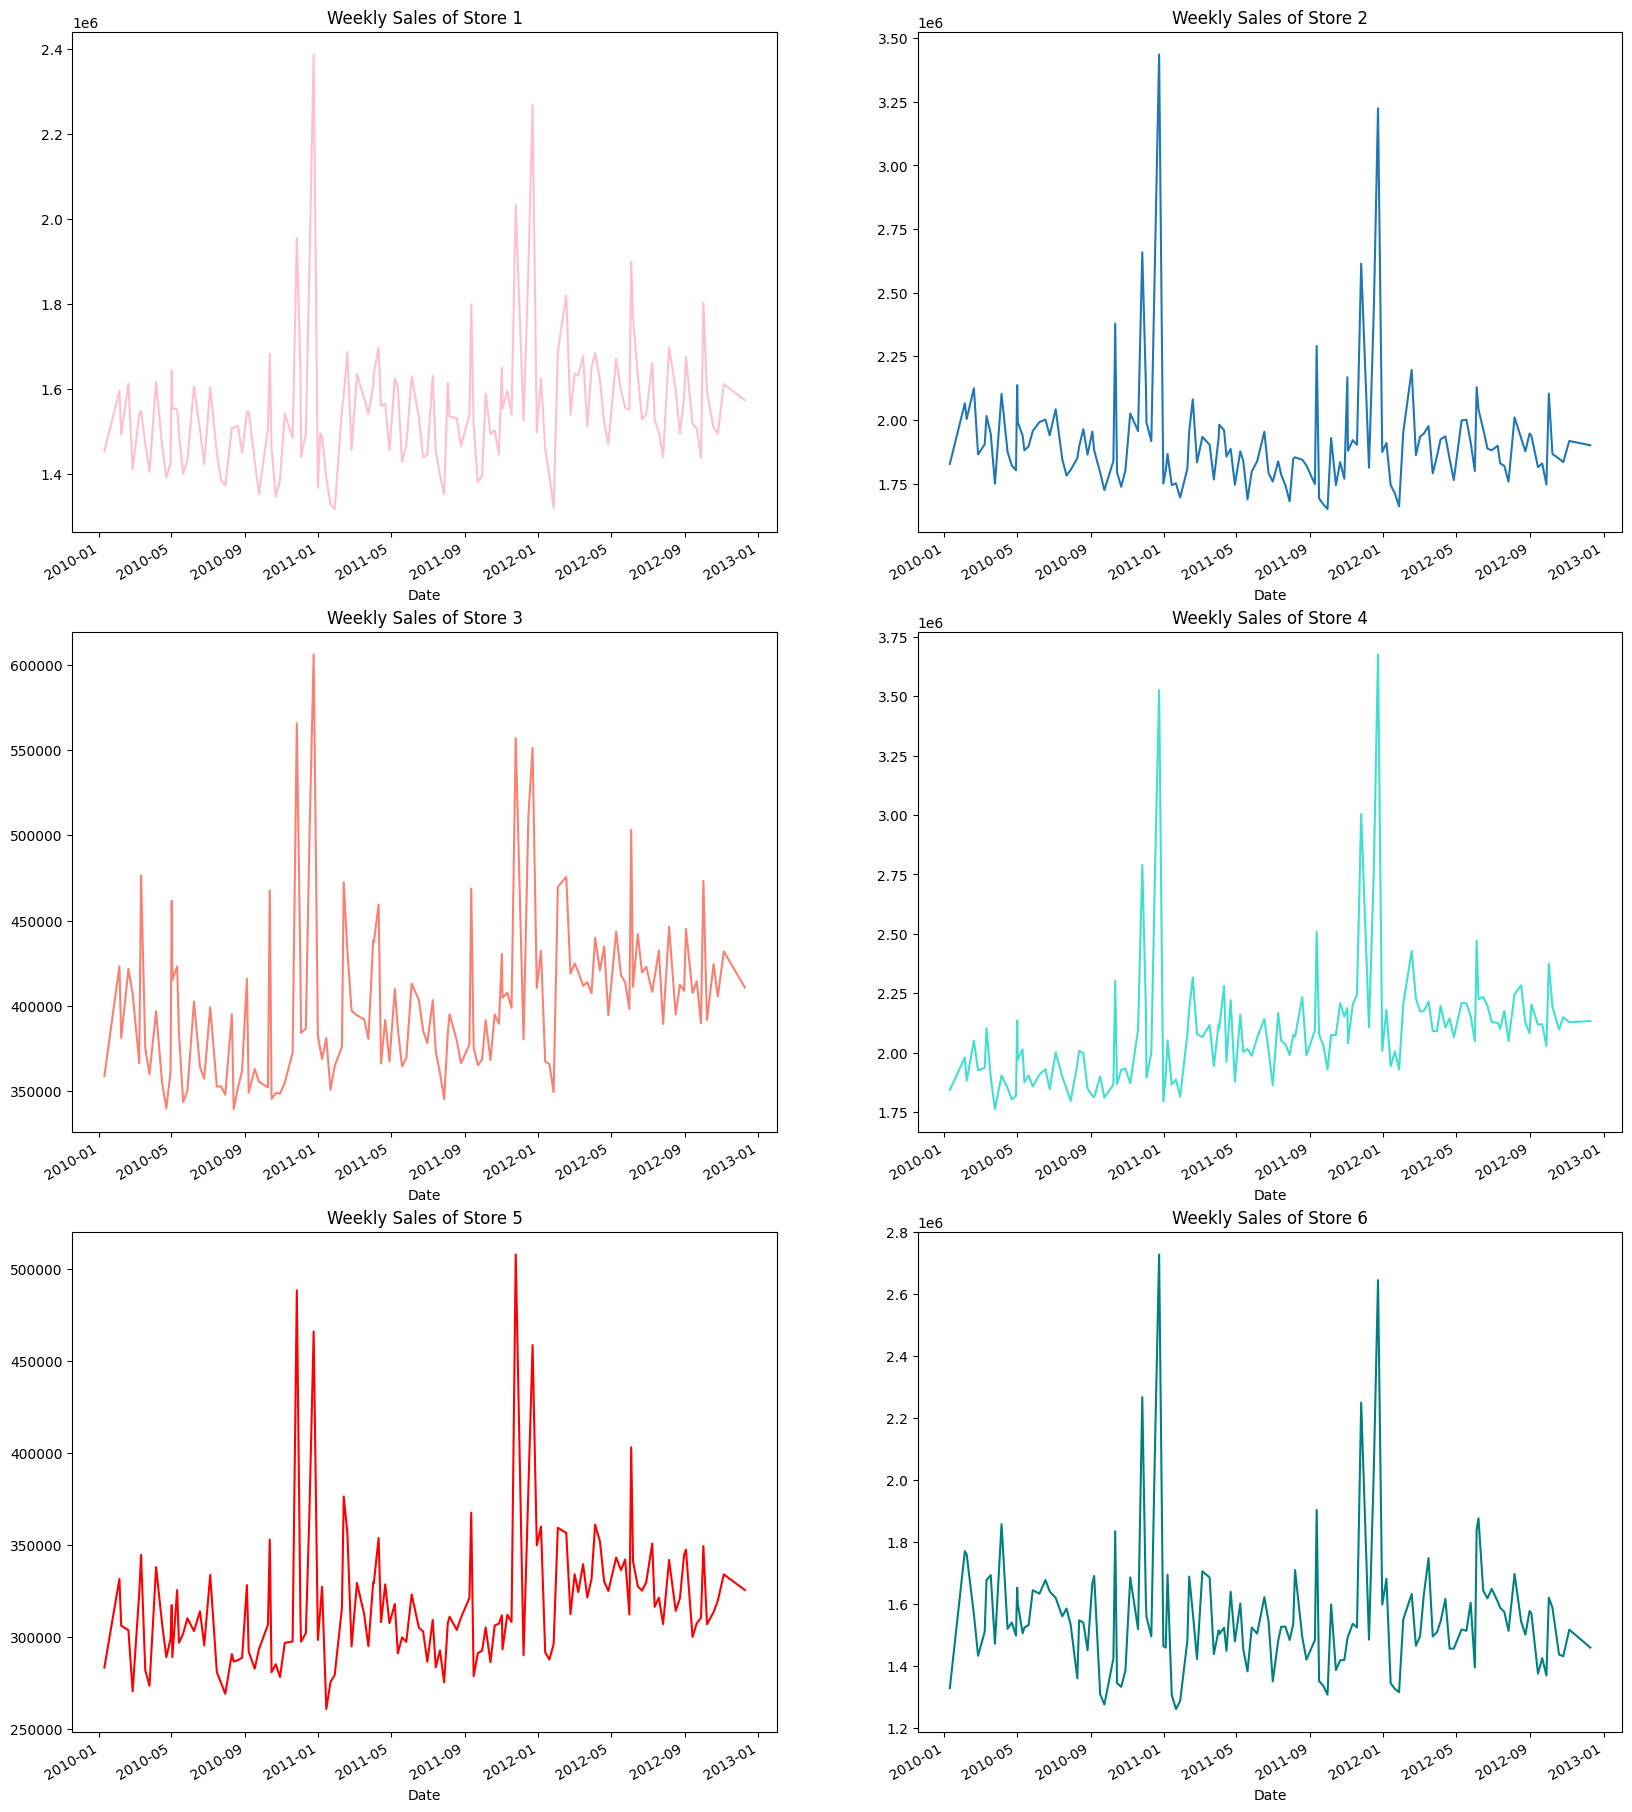

In [55]:
fig,axes=plt.subplots(3,2,figsize=(20,25))

plt.subplot(3,2,1)
s1['Weekly_Sales'].plot(title= 'Weekly Sales of Store 1', color='pink')

plt.subplot(3,2,2)
s2['Weekly_Sales'].plot(title= 'Weekly Sales of Store 2')

plt.subplot(3,2,3)
s3['Weekly_Sales'].plot(title= 'Weekly Sales of Store 3', color = 'salmon')

plt.subplot(3,2,4)
s4['Weekly_Sales'].plot(title= 'Weekly Sales of Store 4', color = 'turquoise')

plt.subplot(3,2,5)
s5['Weekly_Sales'].plot(title= 'Weekly Sales of Store 5', color = 'red')

plt.subplot(3,2,6)
s6['Weekly_Sales'].plot(title= 'Weekly Sales of Store 6', color = 'teal')
plt.show()

In [56]:
y1=s1['Weekly_Sales']
y2=s2['Weekly_Sales']
y3=s3['Weekly_Sales']
y4=s4['Weekly_Sales']
y5=s5['Weekly_Sales']
y6=s6['Weekly_Sales']

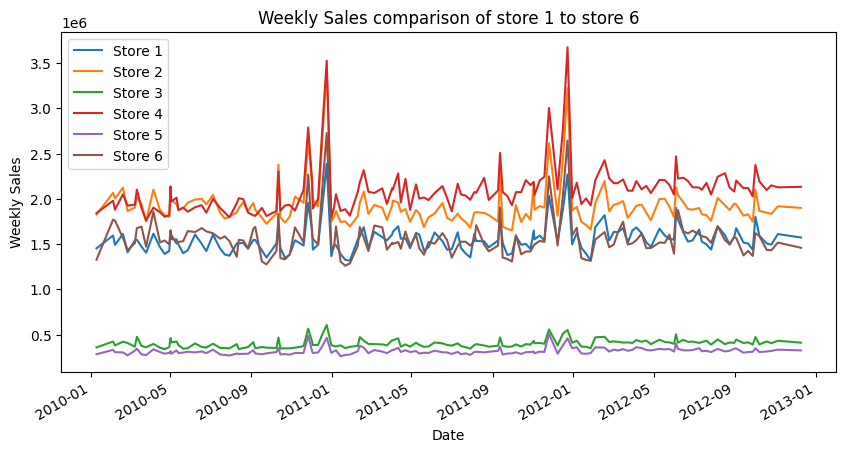

In [57]:
plt.figure(figsize=(10,5))
y1.plot()
y2.plot()
y3.plot()
y4.plot()
y5.plot()
y6.plot()

plt.legend(['Store 1','Store 2','Store 3','Store 4','Store 5','Store 6'])
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales comparison of store 1 to store 6')
plt.show()

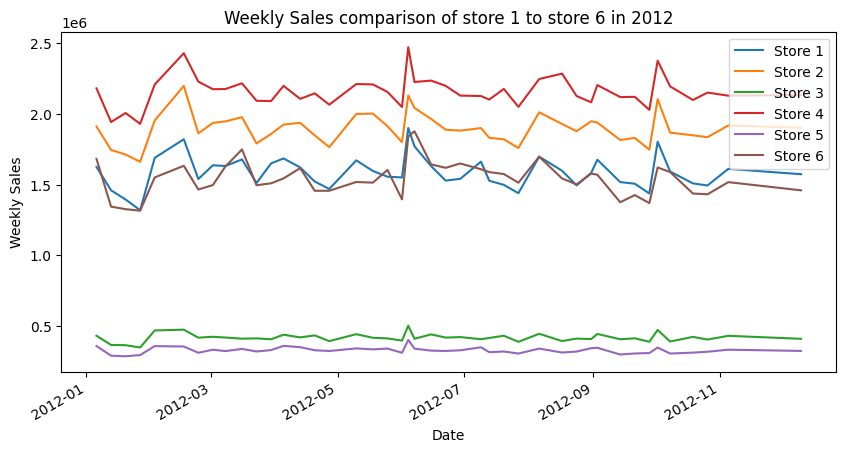

In [58]:
plt.figure(figsize=(10,5))
y1['2012'].plot()
y2['2012'].plot()
y3['2012'].plot()
y4['2012'].plot()
y5['2012'].plot()
y6['2012'].plot()

plt.legend(['Store 1','Store 2','Store 3','Store 4','Store 5','Store 6'])
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales comparison of store 1 to store 6 in 2012')
plt.show()

It is prominently clear in comparison above that Store 4 had highest grossing sales in the year 2012  and store 5 was least grossing.

####Plotting seasonal decomposition graph

In [59]:
from statsmodels.tsa.seasonal import seasonal_decompose

For store 1

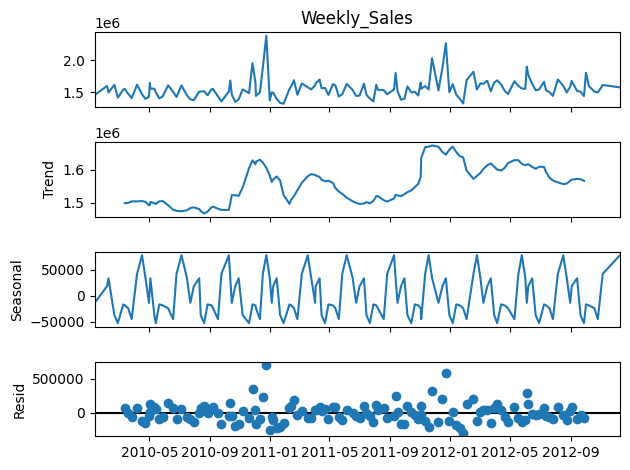

In [60]:
decomposition = seasonal_decompose(s1['Weekly_Sales'], period=12)
fig = decomposition.plot()
plt.show()

For store 2

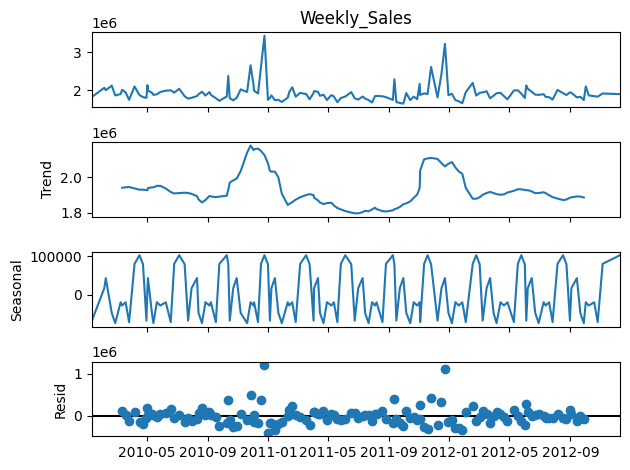

In [61]:
decomposition = seasonal_decompose(s2['Weekly_Sales'], period=12)
fig = decomposition.plot()
plt.show()

For store 3

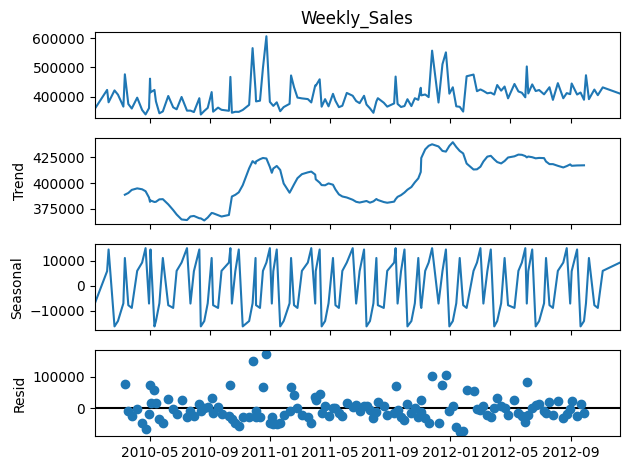

In [62]:
decomposition = seasonal_decompose(s3['Weekly_Sales'], period=12)
fig = decomposition.plot()
plt.show()

For store 4

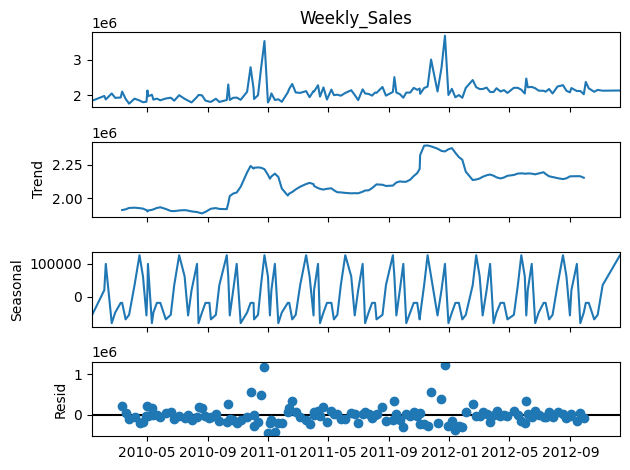

In [63]:
decomposition = seasonal_decompose(s4['Weekly_Sales'], period=12)
fig = decomposition.plot()
plt.show()

For store 5

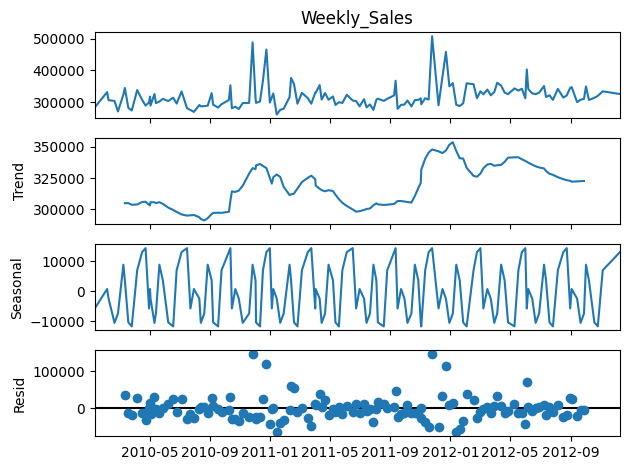

In [64]:
decomposition = seasonal_decompose(s5['Weekly_Sales'], period=12)
fig = decomposition.plot()
plt.show()

For store 6

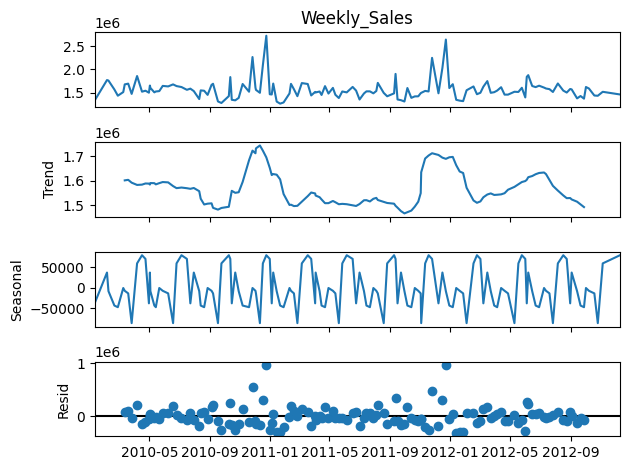

In [65]:
decomposition = seasonal_decompose(s6['Weekly_Sales'], period=12)
fig = decomposition.plot()
plt.show()

####Time series modelling, Predicting and Forecasting

In [66]:
import itertools
p=d=q=range(0, 5)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, d and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 52) for x in list(itertools.product(p, d, q))]

In [67]:
import statsmodels.api as sm

mod1=sm.tsa.statespace.SARIMAX(y1, order=(4, 4, 3), seasonal_order=(1, 1, 0, 52), enforce_invertibility=False)
res1=mod1.fit()

mod2=sm.tsa.statespace.SARIMAX(y2, order=(4, 4, 3), seasonal_order=(1, 1, 0, 52), enforce_invertibility=False)
res2=mod2.fit()

mod3=sm.tsa.statespace.SARIMAX(y3, order=(4, 4, 3), seasonal_order=(1, 1, 0, 52), enforce_invertibility=False)
res3=mod3.fit()

mod4=sm.tsa.statespace.SARIMAX(y4, order=(4, 4, 3), seasonal_order=(1, 1, 0, 52), enforce_invertibility=False)
res4=mod4.fit()

mod5=sm.tsa.statespace.SARIMAX(y5, order=(4, 4, 3), seasonal_order=(1, 1, 0, 52), enforce_invertibility=False)
res5=mod5.fit()

mod6=sm.tsa.statespace.SARIMAX(y6, order=(4, 4, 3), seasonal_order=(1, 1, 0, 52), enforce_invertibility=False)
res6=mod6.fit()

print(res1.summary().tables[1])
print(res2.summary().tables[1])
print(res3.summary().tables[1])
print(res4.summary().tables[1])
print(res5.summary().tables[1])
print(res6.summary().tables[1])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2460      1.051     -1.186      0.236      -3.305       0.813
ar.L2         -1.2495      1.082     -1.155      0.248      -3.370       0.871
ar.L3         -0.9093      0.974     -0.933      0.351      -2.819       1.000
ar.L4         -0.3744      0.560     -0.668      0.504      -1.473       0.724
ma.L1         -1.8119      1.071     -1.692      0.091      -3.911       0.287
ma.L2          0.6756      2.159      0.313      0.754      -3.556       4.907
ma.L3          0.1414      1.112      0.127      0.899      -2.038       2.320
ar.S.L52      -0.4419      0.150     -2.938      0.003      -0.737      -0.147
sigma2        8.6e+10   5.64e-11   1.52e+21      0.000     8.6e+10     8.6e+10
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------

<Figure size 1000x500 with 0 Axes>

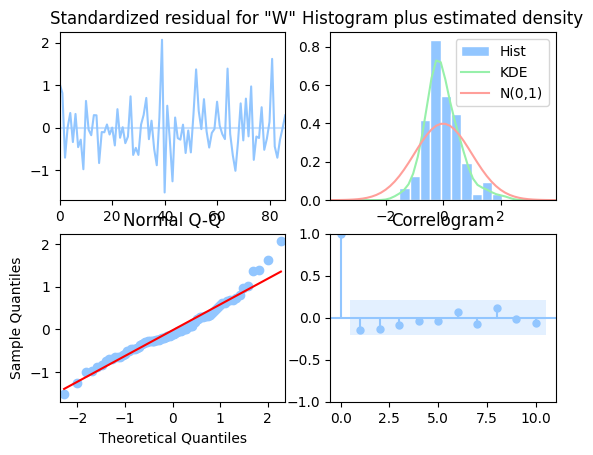

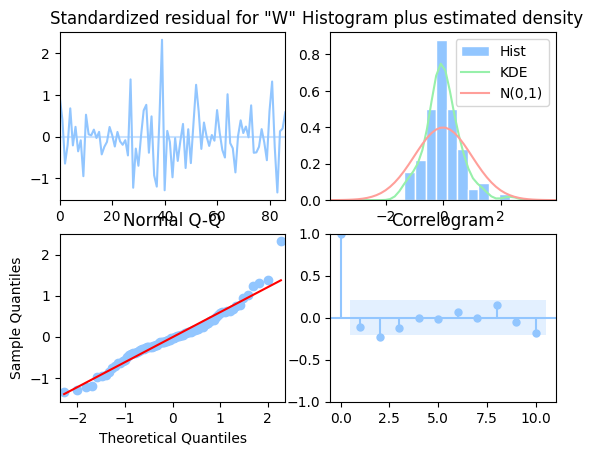

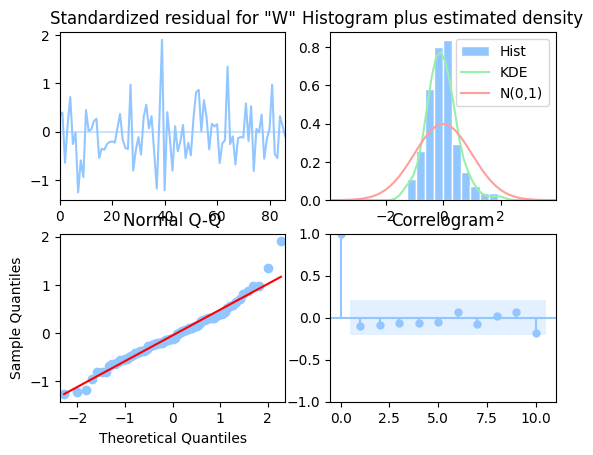

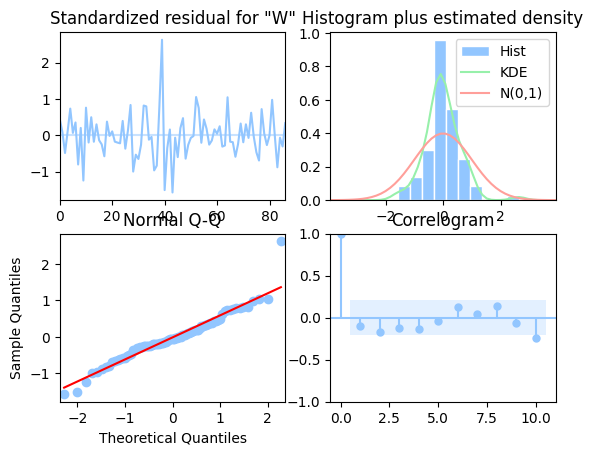

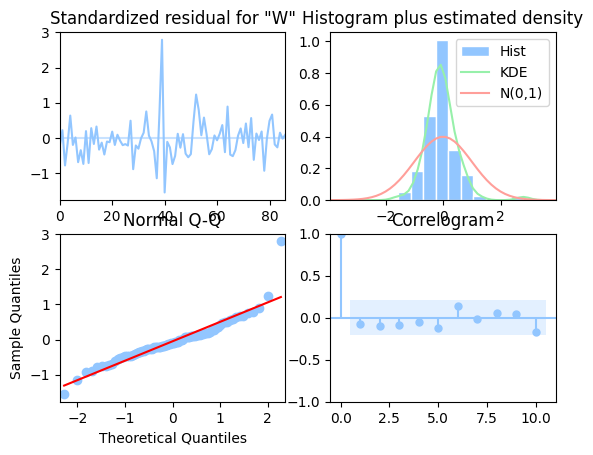

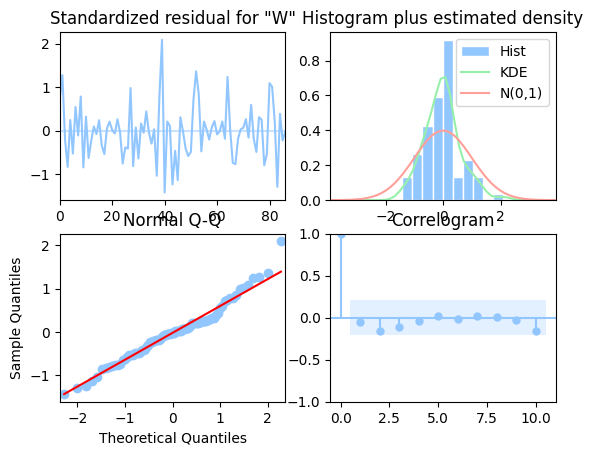

In [68]:
plt.figure(figsize=(10,5))
plt.style.use('seaborn-pastel')
res1.plot_diagnostics()
res2.plot_diagnostics()
res3.plot_diagnostics()
res4.plot_diagnostics()
res5.plot_diagnostics()
res6.plot_diagnostics()
plt.show()

In [69]:
pred1 = res1.get_prediction(start=pd.to_datetime('2012-07-27'), dynamic=False)
pred_c1 = pred1.conf_int()
pred2 = res2.get_prediction(start=pd.to_datetime('2012-07-27'), dynamic=False)
pred_c2 = pred2.conf_int()
pred3 = res3.get_prediction(start=pd.to_datetime('2012-07-27'), dynamic=False)
pred_c3 = pred3.conf_int()
pred4 = res4.get_prediction(start=pd.to_datetime('2012-07-27'), dynamic=False)
pred_c4 = pred4.conf_int()
pred5 = res5.get_prediction(start=pd.to_datetime('2012-07-27'), dynamic=False)
pred_c5 = pred5.conf_int()
pred6 = res6.get_prediction(start=pd.to_datetime('2012-07-27'), dynamic=False)
pred_c6 = pred6.conf_int()

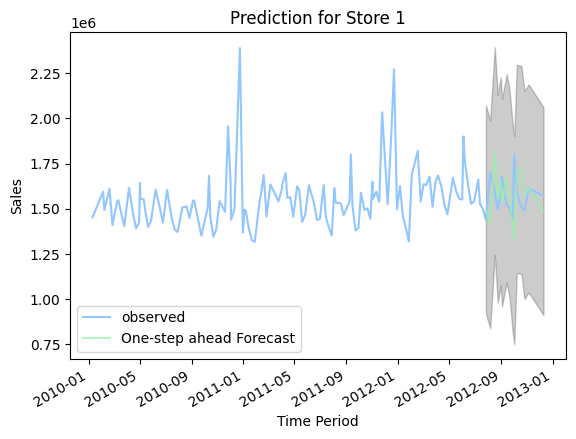

In [70]:
ax = y1['2010':].plot(label='observed')
pred1.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_c1.index,
                pred_c1.iloc[:, 0],
                pred_c1.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')
plt.legend()

plt.title('Prediction for Store 1')
plt.show()

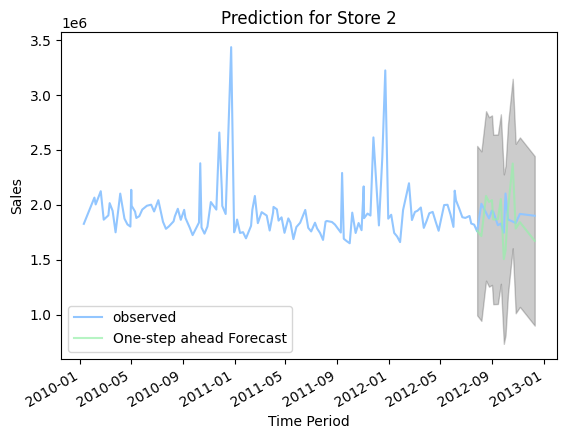

In [71]:
ax = y2['2010':].plot(label='observed')
pred2.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_c2.index,
                pred_c2.iloc[:, 0],
                pred_c2.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')
plt.legend()

plt.title('Prediction for Store 2')
plt.show()

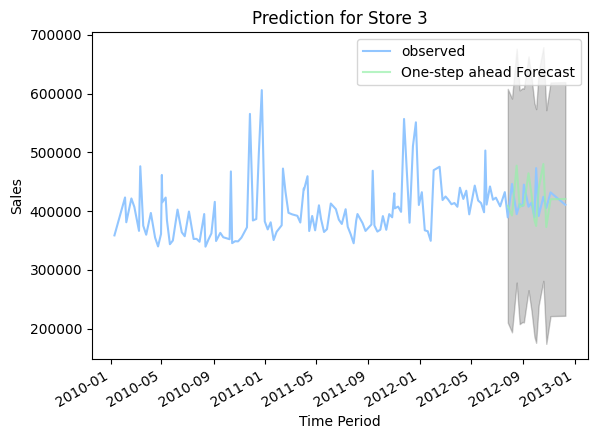

In [72]:
ax = y3['2010':].plot(label='observed')
pred3.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_c3.index,
                pred_c3.iloc[:, 0],
                pred_c3.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')
plt.legend()

plt.title('Prediction for Store 3')
plt.show()

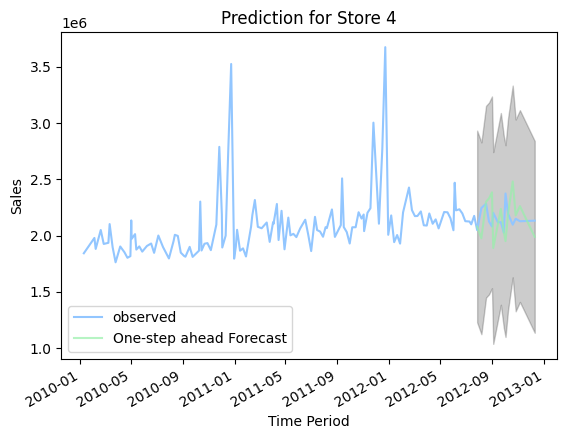

In [73]:
ax = y4['2010':].plot(label='observed')
pred4.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_c4.index,
                pred_c4.iloc[:, 0],
                pred_c4.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')
plt.legend()

plt.title('Prediction for Store 4')
plt.show()

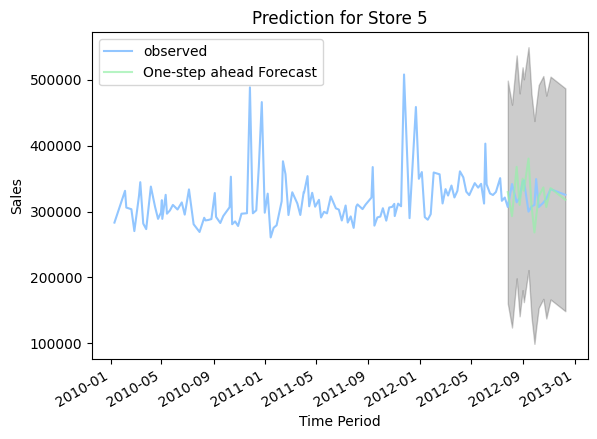

In [74]:
ax = y5['2010':].plot(label='observed')
pred5.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_c5.index,
                pred_c5.iloc[:, 0],
                pred_c5.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')
plt.legend()

plt.title('Prediction for Store 5')
plt.show()

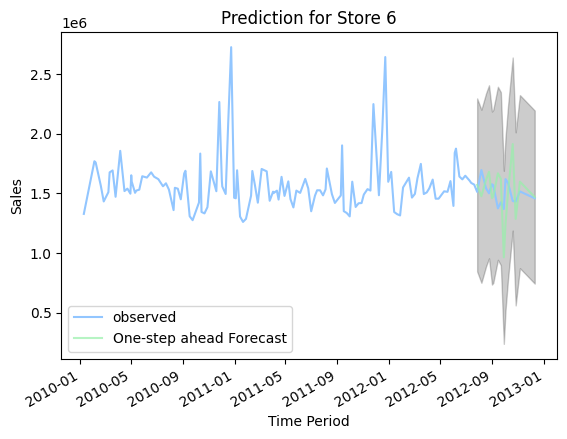

In [75]:
ax = y6['2010':].plot(label='observed')
pred6.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_c6.index,
                pred_c6.iloc[:, 0],
                pred_c6.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')
plt.legend()

plt.title('Prediction for Store 6')
plt.show()

In [76]:
y1_forecasted = pred1.predicted_mean
y1_truth = y1['2012-7-27':]
y2_forecasted = pred2.predicted_mean
y2_truth = y2['2012-7-27':]
y3_forecasted = pred3.predicted_mean
y3_truth = y3['2012-7-27':]
y4_forecasted = pred4.predicted_mean
y4_truth = y4['2012-7-27':]
y5_forecasted = pred5.predicted_mean
y5_truth = y5['2012-7-27':]
y6_forecasted = pred6.predicted_mean
y6_truth = y6['2012-7-27':]

# Compute the mean square error
mse1 = ((y1_forecasted - y1_truth) ** 2).mean()
mse2 = ((y2_forecasted - y2_truth) ** 2).mean()
mse3 = ((y3_forecasted - y3_truth) ** 2).mean()
mse4 = ((y4_forecasted - y4_truth) ** 2).mean()
mse5 = ((y5_forecasted - y5_truth) ** 2).mean()
mse6 = ((y6_forecasted - y6_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is')
print('For store 1: {}'.format(round(mse1, 2)))
print('For store 2: {}'.format(round(mse2, 2)))
print('For store 3: {}'.format(round(mse3, 2)))
print('For store 4: {}'.format(round(mse4, 2)))
print('For store 5: {}'.format(round(mse5, 2)))
print('For store 6: {}'.format(round(mse6, 2)))

The Mean Squared Error of our forecasts is
For store 1: 32685160500.58
For store 2: 58540889402.97
For store 3: 2077090013.83
For store 4: 45820828799.77
For store 5: 1246216142.12
For store 6: 53618255182.9


In [77]:
pred_dynamic1 = res1.get_prediction(start=pd.to_datetime('2012-7-27'), dynamic=True, full_results=True)
pred_dynamic_c1 = pred_dynamic1.conf_int()
pred_dynamic2 = res2.get_prediction(start=pd.to_datetime('2012-7-27'), dynamic=True, full_results=True)
pred_dynamic_c2 = pred_dynamic2.conf_int()
pred_dynamic3 = res3.get_prediction(start=pd.to_datetime('2012-7-27'), dynamic=True, full_results=True)
pred_dynamic_c3 = pred_dynamic3.conf_int()
pred_dynamic4 = res4.get_prediction(start=pd.to_datetime('2012-7-27'), dynamic=True, full_results=True)
pred_dynamic_c4 = pred_dynamic4.conf_int()
pred_dynamic5 = res5.get_prediction(start=pd.to_datetime('2012-7-27'), dynamic=True, full_results=True)
pred_dynamic_c5 = pred_dynamic5.conf_int()
pred_dynamic6 = res6.get_prediction(start=pd.to_datetime('2012-7-27'), dynamic=True, full_results=True)
pred_dynamic_c6 = pred_dynamic6.conf_int()

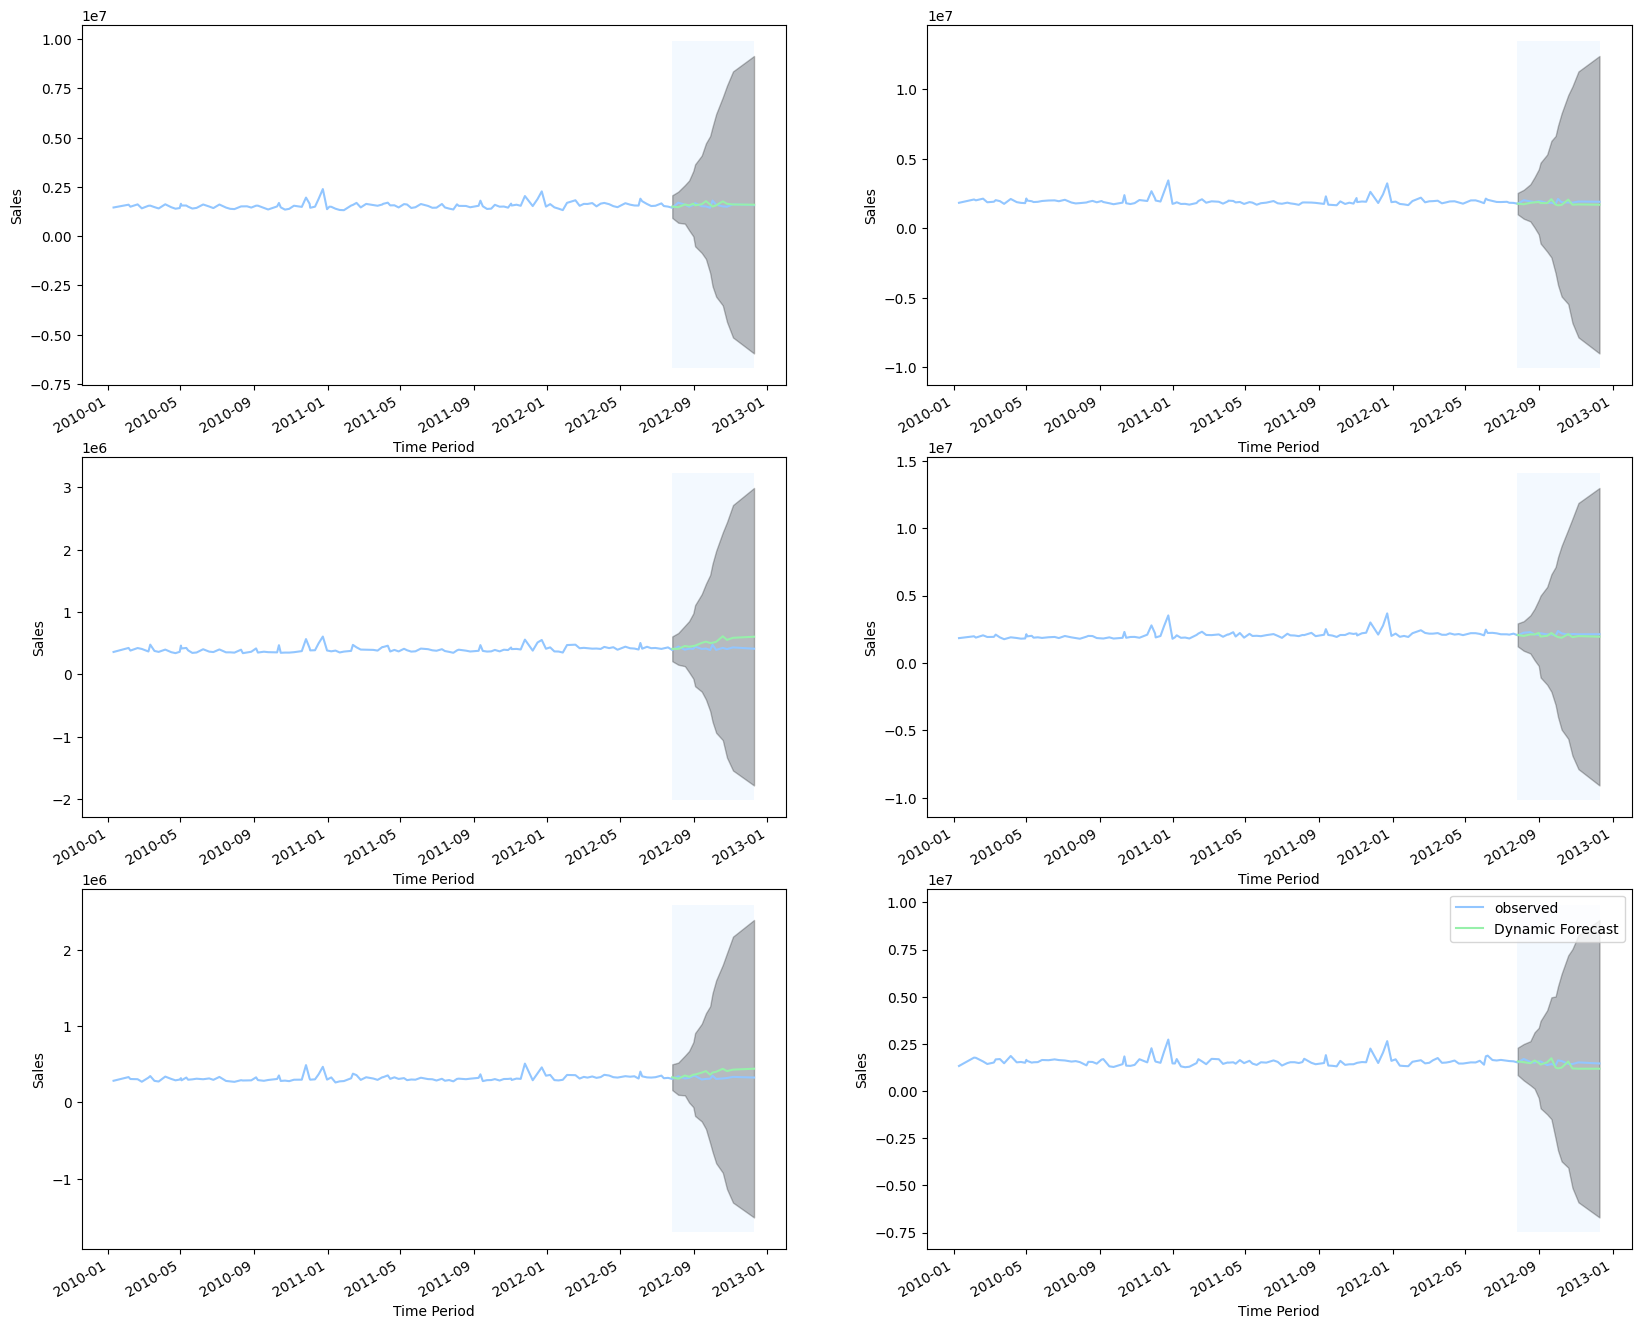

In [78]:
fig,axes=plt.subplots(3,2,figsize=(20,18))

plt.subplot(3,2,1)
ax = y1['2010':].plot(label='observed')
pred_dynamic1.predicted_mean.plot(label='Dynamic Forecast', ax=ax)
ax.fill_between(pred_dynamic_c1.index, pred_dynamic_c1.iloc[:, 0], pred_dynamic_c1.iloc[:, 1], color='k', alpha=.25)
ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2012-7-26'), y1.index[-1], alpha=.1, zorder=-1)
ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')

plt.subplot(3,2,2)
ax = y2['2010':].plot(label='observed')
pred_dynamic2.predicted_mean.plot(label='Dynamic Forecast', ax=ax)
ax.fill_between(pred_dynamic_c2.index, pred_dynamic_c2.iloc[:, 0], pred_dynamic_c2.iloc[:, 1], color='k', alpha=.25)
ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2012-7-26'), y2.index[-1], alpha=.1, zorder=-1)
ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')

plt.subplot(3,2,3)
ax = y3['2010':].plot(label='observed')
pred_dynamic3.predicted_mean.plot(label='Dynamic Forecast', ax=ax)
ax.fill_between(pred_dynamic_c3.index, pred_dynamic_c3.iloc[:, 0], pred_dynamic_c3.iloc[:, 1], color='k', alpha=.25)
ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2012-7-26'), y3.index[-1], alpha=.1, zorder=-1)
ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')

plt.subplot(3,2,4)
ax = y4['2010':].plot(label='observed')
pred_dynamic4.predicted_mean.plot(label='Dynamic Forecast', ax=ax)
ax.fill_between(pred_dynamic_c4.index, pred_dynamic_c4.iloc[:, 0], pred_dynamic_c4.iloc[:, 1], color='k', alpha=.25)
ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2012-7-26'), y4.index[-1], alpha=.1, zorder=-1)
ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')

plt.subplot(3,2,5)
ax = y5['2010':].plot(label='observed')
pred_dynamic5.predicted_mean.plot(label='Dynamic Forecast', ax=ax)
ax.fill_between(pred_dynamic_c5.index, pred_dynamic_c5.iloc[:, 0], pred_dynamic_c5.iloc[:, 1], color='k', alpha=.25)
ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2012-7-26'), y5.index[-1], alpha=.1, zorder=-1)
ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')

plt.subplot(3,2,6)
ax = y6['2010':].plot(label='observed')
pred_dynamic6.predicted_mean.plot(label='Dynamic Forecast', ax=ax)
ax.fill_between(pred_dynamic_c6.index, pred_dynamic_c6.iloc[:, 0], pred_dynamic_c6.iloc[:, 1], color='k', alpha=.25)
ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2012-7-26'), y6.index[-1], alpha=.1, zorder=-1)
ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')


plt.savefig('SalesForecast_12weeks')
plt.legend()
plt.show()

In [79]:
# Extract the predicted and true values of our time series
y1_forecasted = pred_dynamic1.predicted_mean
y1_truth = y1['2012-7-27':]
y2_forecasted = pred_dynamic2.predicted_mean
y2_truth = y2['2012-7-27':]
y3_forecasted = pred_dynamic3.predicted_mean
y3_truth = y3['2012-7-27':]
y4_forecasted = pred_dynamic4.predicted_mean
y4_truth = y4['2012-7-27':]
y5_forecasted = pred_dynamic5.predicted_mean
y5_truth = y5['2012-7-27':]
y6_forecasted = pred_dynamic6.predicted_mean
y6_truth = y6['2012-7-27':]

# Compute the Root mean square error
rmse1 = np.sqrt(((y1_forecasted - y1_truth) ** 2).mean())
rmse2 = np.sqrt(((y2_forecasted - y2_truth) ** 2).mean())
rmse3 = np.sqrt(((y3_forecasted - y3_truth) ** 2).mean())
rmse4 = np.sqrt(((y4_forecasted - y4_truth) ** 2).mean())
rmse5 = np.sqrt(((y5_forecasted - y5_truth) ** 2).mean())
rmse6 = np.sqrt(((y6_forecasted - y6_truth) ** 2).mean())
print('The Root Mean Squared Error of our forecasts is')
print('For store 1: {}'.format(round(rmse1, 2)))
print('For store 2: {}'.format(round(rmse2, 2)))
print('For store 3: {}'.format(round(rmse3, 2)))
print('For store 4: {}'.format(round(rmse4, 2)))
print('For store 5: {}'.format(round(rmse5, 2)))
print('For store 6: {}'.format(round(rmse6, 2)))

The Root Mean Squared Error of our forecasts is
For store 1: 156401.38
For store 2: 197715.42
For store 3: 108992.82
For store 4: 201660.94
For store 5: 73990.23
For store 6: 227737.19


In [80]:
Residual1= y1_forecasted - y1_truth
Residual2= y2_forecasted - y2_truth
Residual3= y3_forecasted - y3_truth
Residual4= y4_forecasted - y4_truth
Residual5= y5_forecasted - y5_truth
Residual6= y6_forecasted - y6_truth
print('The Residuals for considered 6 stores is')
print("For Store 1:",np.abs(Residual1).sum())
print("For Store 2:",np.abs(Residual2).sum())
print("For Store 3:",np.abs(Residual3).sum())
print("For Store 4:",np.abs(Residual4).sum())
print("For Store 5:",np.abs(Residual5).sum())
print("For Store 6:",np.abs(Residual6).sum())

The Residuals for considered 6 stores is
For Store 1: 1837797.2717348312
For Store 2: 2352651.0859345384
For Store 3: 1372047.7756602052
For Store 4: 2447144.705866644
For Store 5: 949416.4467736362
For Store 6: 2995298.4793212716


In [81]:
# Get forecast 12 weeks ahead in future
pred_uc1 = res1.get_forecast(steps=12)
pred_uc2 = res2.get_forecast(steps=12)
pred_uc3 = res3.get_forecast(steps=12)
pred_uc4 = res4.get_forecast(steps=12)
pred_uc5 = res5.get_forecast(steps=12)
pred_uc6 = res6.get_forecast(steps=12)

# Get confidence intervals of forecasts
pred_c1 = pred_uc1.conf_int()
pred_c2 = pred_uc2.conf_int()
pred_c3 = pred_uc3.conf_int()
pred_c4 = pred_uc4.conf_int()
pred_c5 = pred_uc5.conf_int()
pred_c6 = pred_uc6.conf_int()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa

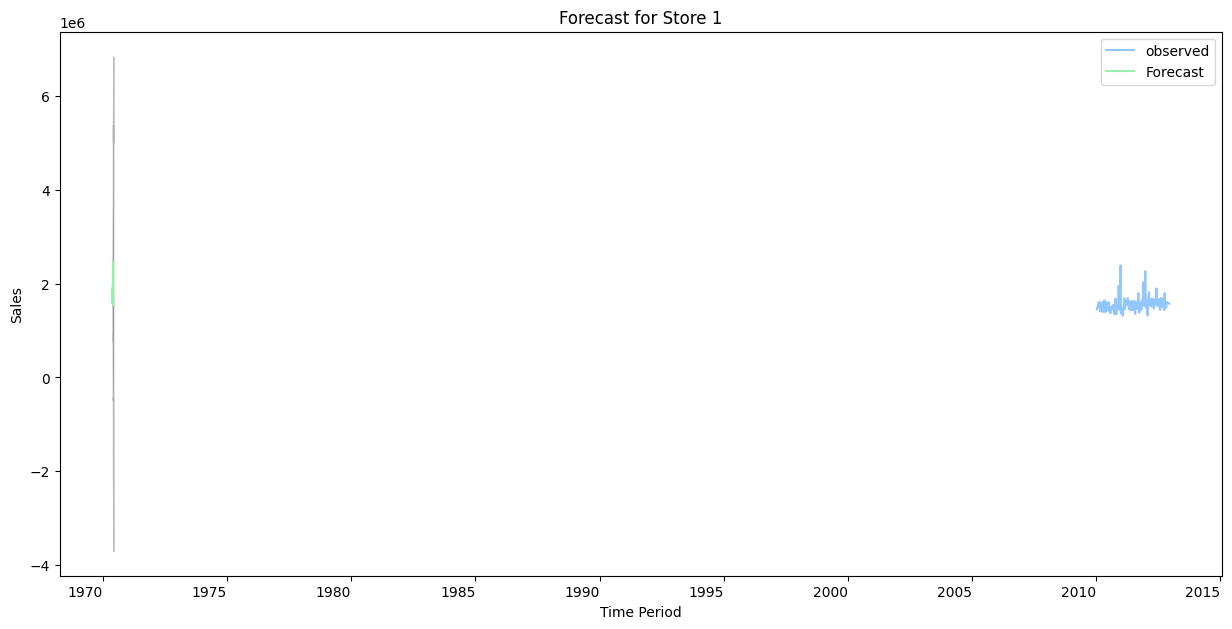

In [89]:
plt.figure(figsize=(15,8))
ax = y1.plot(label='observed')
pred_uc1.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_c1.index,
                pred_c1.iloc[:, 0],
                pred_c1.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')

plt.title('Forecast for Store 1')
plt.savefig('Store1Forecast.png')
plt.legend()
plt.show()

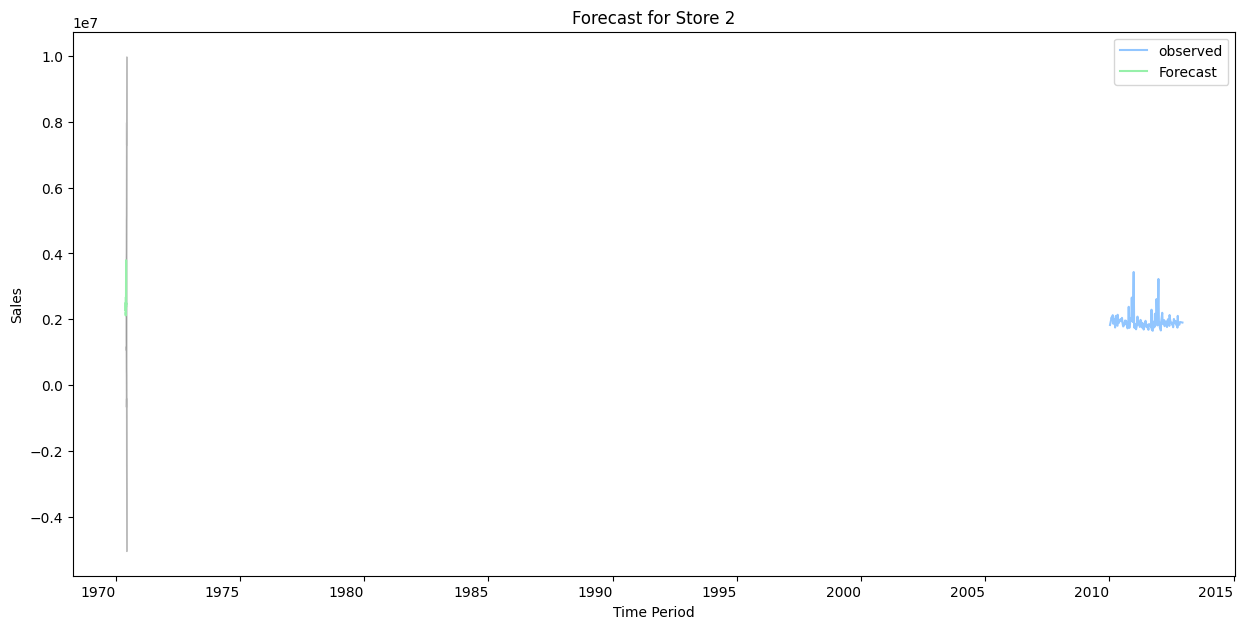

In [83]:
plt.figure(figsize=(15,8))
ax = y2.plot(label='observed')
pred_uc2.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_c2.index,
                pred_c2.iloc[:, 0],
                pred_c2.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')

plt.title('Forecast for Store 2')
plt.legend()
plt.show()

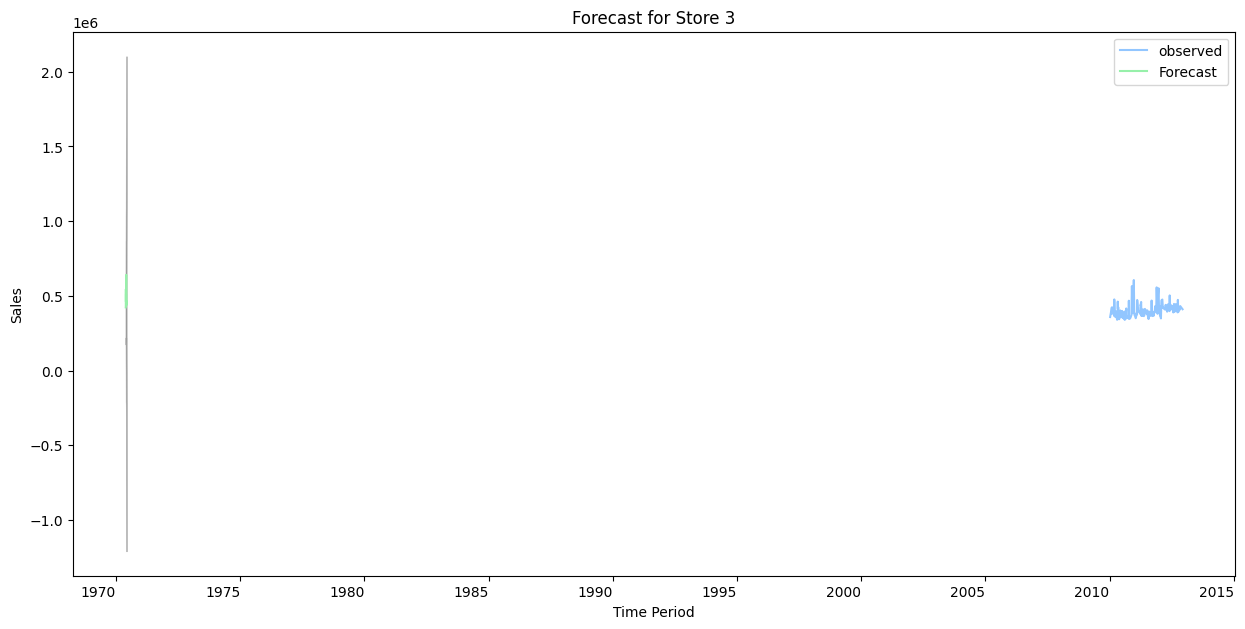

In [84]:
plt.figure(figsize=(15,8))
ax = y3.plot(label='observed')
pred_uc3.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_c3.index,
                pred_c3.iloc[:, 0],
                pred_c3.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')

plt.title('Forecast for Store 3')
plt.legend()
plt.show()

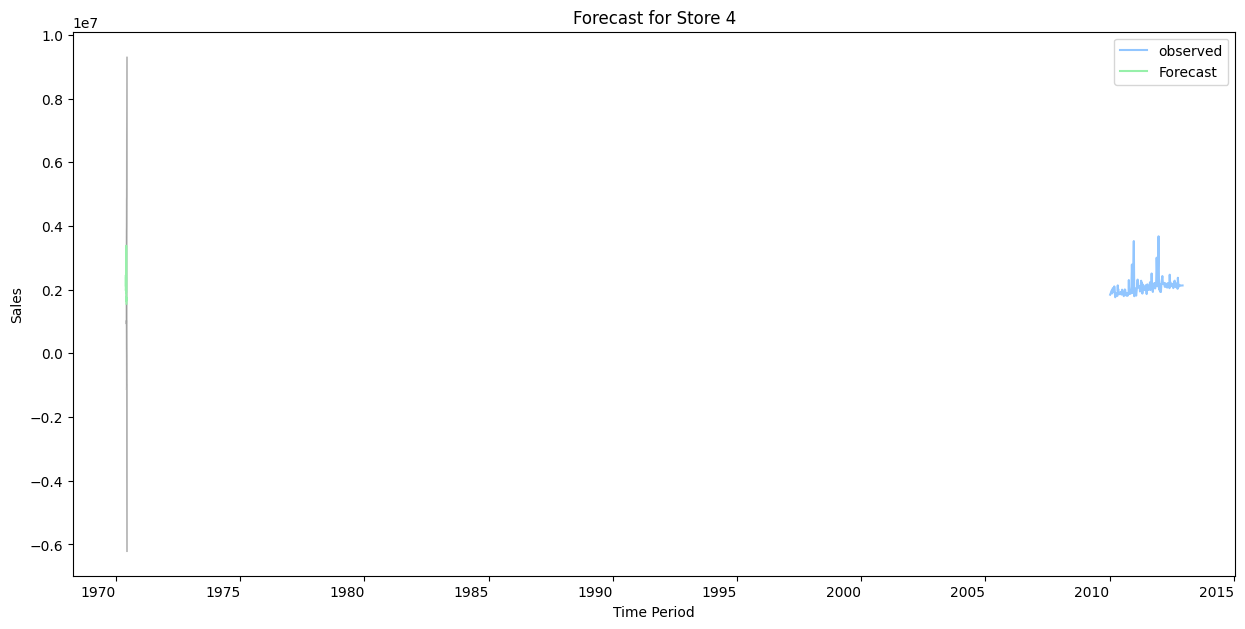

In [85]:
plt.figure(figsize=(15,8))
ax = y4.plot(label='observed')
pred_uc4.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_c4.index,
                pred_c4.iloc[:, 0],
                pred_c4.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')

plt.title('Forecast for Store 4')
plt.legend()
plt.show()

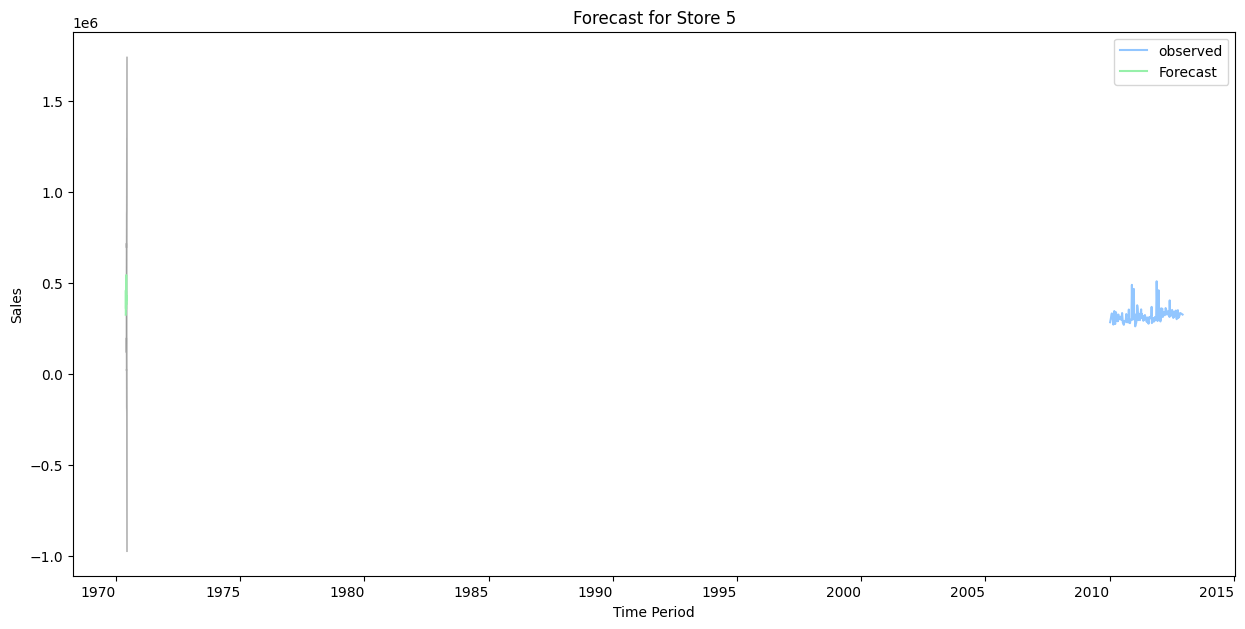

In [86]:
plt.figure(figsize=(15,8))
ax = y5.plot(label='observed')
pred_uc5.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_c5.index,
                pred_c5.iloc[:, 0],
                pred_c5.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')

plt.title('Forecast for Store 5')
plt.legend()
plt.show()

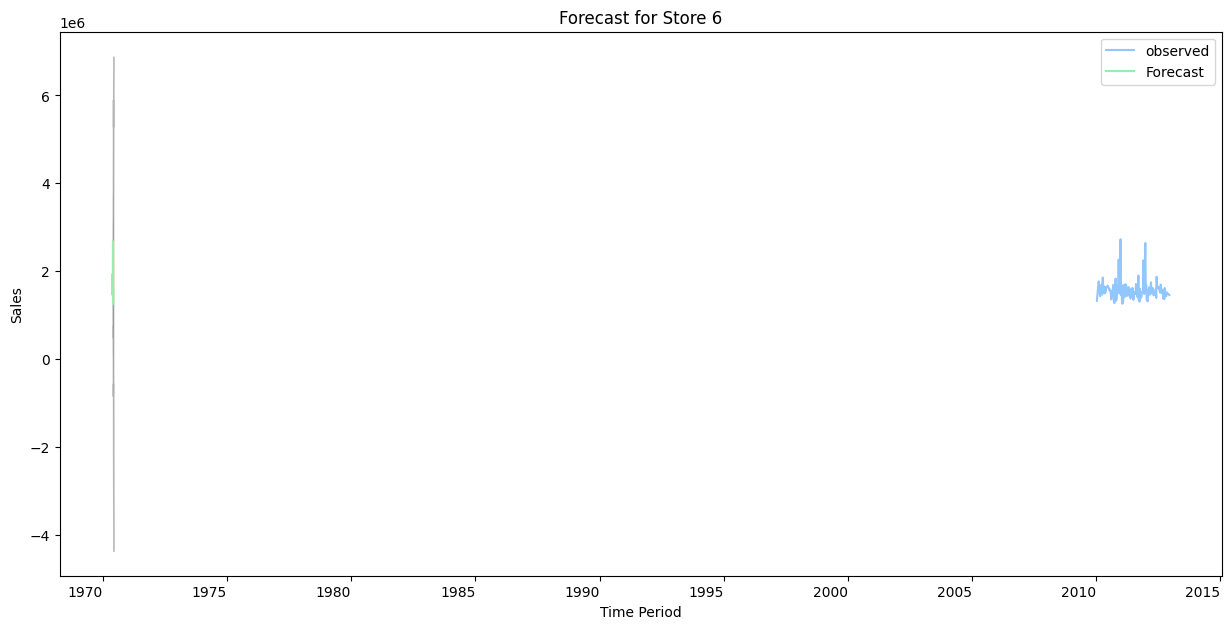

In [87]:
plt.figure(figsize=(15,8))
ax = y6.plot(label='observed')
pred_uc6.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_c6.index,
                pred_c6.iloc[:, 0],
                pred_c6.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')

plt.title('Forecast for Store 6')
plt.legend()
plt.show()

In [90]:
# Submitted by - Amit Jagtap
# Email ID - amitjgtp2@gmail.com